# Energy Dataset Exploratory Data Analysis

This dataset is taken from a [Git Repository](https://github.com/LuisM78/Appliances-energy-prediction-data) of data for the publication:

Data driven prediction models of energy use of appliances in a low-energy house. Luis M. Candanedo, Véronique Feldheim, Dominique Deramaix. Energy and Buildings, Volume 140, 1 April 2017, Pages 81-97, ISSN 0378-7788, http://dx.doi.org/10.1016/j.enbuild.2017.01.083.

## The Task

Do an Exploratory Data Analysis on the energy dataset. <br> Keeping in mind : **Understand energy usage by appliances and the attributes that contribute to aggregate energy usage.**

### General Tips Followed 
> [Chloe Mawer, Jonathan Whitmore - Exploratory Data Analysis in Python - PyCon 2017](https://www.youtube.com/watch?v=W5WE9Db2RLU)

> - Before plotting/joining/doing something, have a question or hypothesis that you want to investigate
> - Draw a plot of what you want to see on paper to sketch the idea
> - Write it down, then make the plan on how to get there
> - How do you know you aren't fooling yourself
> - What else can I check if this is actually true?
> - What evidence could there be that it's wrong?

### Tidy Data
> Hadley Wickham's concept of a **tidy dataset** summarized as:

> - Each variable forms a column
> - Each observation forms a row
> - Each type of observational unit forms a table

In [1]:
# Uncomment and run if any of the following libraries not available
#!pip install tqdm
#!pip install missingno
#!pip install pandas_profiling

In [22]:
# To output plotting commands display inline within frontends
%matplotlib inline
#To obtain retina-display quality for figures into code
%config InlineBackend.figure_format='retina'

# To use features which will appear in newer versions while having an older release of Python
from __future__ import absolute_import, division, print_function

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.pyplot import GridSpec

import seaborn as sns
sns.set_context("poster", font_scale=1.3)

import numpy as np
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import pandas_profiling

import os, sys

#from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

import missingno as msno

from sklearn.datasets import make_blobs

import time

### Description of the Data Columns (Units)
> Where indicated, data from the nearest airport weather station (Chièvres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis, rp5.ru. Permission was obtained from Reliable Prognosis for the distribution of the **4 months of data**.
<table>
    <thead class="valign-top">
        <tr>
            <th scope="col" class="rowsep-1 align-left">Variables, Description</th>
            <th scope="col" class="rowsep-1 align-left">Units</th>
            <th scope="col" class="rowsep-1 align-left">Number of Features</th>
        </tr>
    </thead>
    <tbody>
        <tr>
        <th class="align-left" scope="row">date, Date time stamp</th>
            <td class="align-left">year-month-day hour:min:s</td>
            <td class="align-char">–</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">Appliances, Appliances energy consumption</th>
            <td class="align-left">Wh</td>
            <td class="align-char">1</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">Lights, Light energy consumption</th>
            <td class="align-left">Wh</td>
            <td class="align-char">2</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">T1, Temperature in kitchen area</th>
            <td class="align-left">°C</td>
            <td class="align-char">3</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">RH_1, Humidity in kitchen area</th>
            <td class="align-left">%</td>
            <td class="align-char">4</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">T2, Temperature in living room area</th>
            <td class="align-left">°C</td>
            <td class="align-char">5</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">RH_2, Humidity in living room area</th>
            <td class="align-left">%</td>
            <td class="align-char">6</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">T3, Temperature in laundry room area</th>
            <td class="align-left">°C</td>
            <td class="align-char">7</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">RH_3, Humidity in laundry room area</th>
            <td class="align-left">%</td>
            <td class="align-char">8</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">T4, Temperature in office room</th>
            <td class="align-left">°C</td>
            <td class="align-char">9</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">RH_4, Humidity in office room</th>
            <td class="align-left">%</td>
            <td class="align-char">10</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">T5, Temperature in bathroom</th>
            <td class="align-left">°C</td>
            <td class="align-char">11</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">RH_5, Humidity in bathroom</th>
            <td class="align-left">%</td>
            <td class="align-char">12</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">T6, Temperature outside the building (north side)</th>
            <td class="align-left">°C</td>
            <td class="align-char">13</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">RH_6, Humidity outside the building (north side)</th>
            <td class="align-left">%</td>
            <td class="align-char">14</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">T7, Temperature in ironing room</th>
            <td class="align-left">°C</td>
            <td class="align-char">15</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">RH_7, Humidity in ironing room</th>
            <td class="align-left">%</td>
            <td class="align-char">16</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">T8, Temperature in teenager room 2</th>
            <td class="align-left">°C</td>
            <td class="align-char">17</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">RH_8, Humidity in teenager room 2</th>
            <td class="align-left">%</td>
            <td class="align-char">18</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">T9, Temperature in parents room</th>
            <td class="align-left">°C</td>
            <td class="align-char">19</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">RH_9, Humidity in parents room</th>
            <td class="align-left">%</td>
            <td class="align-char">20</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">T_out, Temperature outside (from Chièvres weather station)</th>
            <td class="align-left">°C</td>
            <td class="align-char">21</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">Press_mm_hg, Pressure (from Chièvres weather station)</th>
            <td class="align-left">mm Hg</td>
            <td class="align-char">22</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">RH_out, Humidity outside (from Chièvres weather station)</th>
            <td class="align-left">%</td>
            <td class="align-char">23</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">Windspeed, Windspeed (from Chièvres weather station)</th>
            <td class="align-left">m/s</td>
            <td class="align-char">24</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">Visibility, Visibility (from Chièvres weather station)</th>
            <td class="align-left">km</td>
            <td class="align-char">25</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">Tdewpoint, Dew point temp (from Chièvres weather station)</th>
            <td class="align-left">°C</td>
            <td class="align-char">26</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">rv1, Random Variable 1</th>
            <td class="align-left">Non dimensional</td>
            <td class="align-char">27</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">rv2, Random Variable 2</th>
            <td class="align-left">Non dimensional</td>
            <td class="align-char">28</td>
        </tr>
    </tbody>
</table>

In [3]:
# Loading the data from the Case Study GitHub
#df = pd.read_csv("https://raw.githubusercontent.com/eklavyasaxena/Advances-in-Data-Sciences-and-Architecture/master/ADS_CaseStudy_2/Data_for_EnergyCaseStudy/energydata_complete.csv")
df = pd.read_csv("../Data_for_EnergyCaseStudy/energydata_complete.csv")

In [4]:
df.shape

(19735, 29)

In [5]:
df.head()

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4    ...             T9   RH_9     T_out  \
0  19.79  44.730000  19.000000    ...      17.033333  45.53  6.600000   
1  19.79  44.790000  19.000000    ...      17.066667  45.56  6.483333   
2  19.79  44.933333  18.926667    ...      17.000000  45.50  6.366667   
3  19.79  45.000000  18.890000    ...      17.000000  45.40  6.250000   
4  19.79  45.000000  18.890000    ...      17.000000  45.40  6.133333   

   Press_mm_hg  RH_out  Windspeed  Visibility  Tdewpoint        rv1        rv2  
0        733.5    92.0   7.000000   63.000000        5.3  13.275433  13.275433  
1        733.6    92.0   6.666667   59.166667        5.2  18.606195  18.606195  
2        733.7    92.0   6.333333   55.333333        5.1  28.642668  28.642668  
3        733.8    92.0   6.000000   51.500000        5.0  45.410389  45.410389  
4        733.9    92.0   5.666667   47.666667        4.9  10.084097  10.084097  

[5 rows x 29 columns]

In [6]:
df.describe().T

count        mean         std         min         25%  \
Appliances   19735.0   97.694958  102.524891   10.000000   50.000000   
lights       19735.0    3.801875    7.935988    0.000000    0.000000   
T1           19735.0   21.686571    1.606066   16.790000   20.760000   
RH_1         19735.0   40.259739    3.979299   27.023333   37.333333   
T2           19735.0   20.341219    2.192974   16.100000   18.790000   
RH_2         19735.0   40.420420    4.069813   20.463333   37.900000   
T3           19735.0   22.267611    2.006111   17.200000   20.790000   
RH_3         19735.0   39.242500    3.254576   28.766667   36.900000   
T4           19735.0   20.855335    2.042884   15.100000   19.530000   
RH_4         19735.0   39.026904    4.341321   27.660000   35.530000   
T5           19735.0   19.592106    1.844623   15.330000   18.277500   
RH_5         19735.0   50.949283    9.022034   29.815000   45.400000   
T6           19735.0    7.910939    6.090347   -6.065000    3.626667   
RH_6         19735.0   54.609083   31.149806    1.000000   30.025000   
T7           19735.0   20.267106    2.109993   15.390000   18.700000   
RH_7         19735.0   35.388200    5.114208   23.200000   31.500000   
T8           19735.0   22.029107    1.956162   16.306667   20.790000   
RH_8         19735.0   42.936165    5.224361   29.600000   39.066667   
T9           19735.0   19.485828    2.014712   14.890000   18.000000   
RH_9         19735.0   41.552401    4.151497   29.166667   38.500000   
T_out        19735.0    7.411665    5.317409   -5.000000    3.666667   
Press_mm_hg  19735.0  755.522602    7.399441  729.300000  750.933333   
RH_out       19735.0   79.750418   14.901088   24.000000   70.333333   
Windspeed    19735.0    4.039752    2.451221    0.000000    2.000000   
Visibility   19735.0   38.330834   11.794719    1.000000   29.000000   
Tdewpoint    19735.0    3.760707    4.194648   -6.600000    0.900000   
rv1          19735.0   24.988033   14.496634    0.005322   12.497889   
rv2          19735.0   24.988033   14.496634    0.005322   12.497889   

                    50%         75%          max  
Appliances    60.000000  100.000000  1080.000000  
lights         0.000000    0.000000    70.000000  
T1            21.600000   22.600000    26.260000  
RH_1          39.656667   43.066667    63.360000  
T2            20.000000   21.500000    29.856667  
RH_2          40.500000   43.260000    56.026667  
T3            22.100000   23.290000    29.236000  
RH_3          38.530000   41.760000    50.163333  
T4            20.666667   22.100000    26.200000  
RH_4          38.400000   42.156667    51.090000  
T5            19.390000   20.619643    25.795000  
RH_5          49.090000   53.663333    96.321667  
T6             7.300000   11.256000    28.290000  
RH_6          55.290000   83.226667    99.900000  
T7            20.033333   21.600000    26.000000  
RH_7          34.863333   39.000000    51.400000  
T8            22.100000   23.390000    27.230000  
RH_8          42.375000   46.536000    58.780000  
T9            19.390000   20.600000    24.500000  
RH_9          40.900000   44.338095    53.326667  
T_out          6.916667   10.408333    26.100000  
Press_mm_hg  756.100000  760.933333   772.300000  
RH_out        83.666667   91.666667   100.000000  
Windspeed      3.666667    5.500000    14.000000  
Visibility    40.000000   40.000000    66.000000  
Tdewpoint      3.433333    6.566667    15.500000  
rv1           24.897653   37.583769    49.996530  
rv2           24.897653   37.583769    49.996530

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
date           19735 non-null object
Appliances     19735 non-null int64
lights         19735 non-null int64
T1             19735 non-null float64
RH_1           19735 non-null float64
T2             19735 non-null float64
RH_2           19735 non-null float64
T3             19735 non-null float64
RH_3           19735 non-null float64
T4             19735 non-null float64
RH_4           19735 non-null float64
T5             19735 non-null float64
RH_5           19735 non-null float64
T6             19735 non-null float64
RH_6           19735 non-null float64
T7             19735 non-null float64
RH_7           19735 non-null float64
T8             19735 non-null float64
RH_8           19735 non-null float64
T9             19735 non-null float64
RH_9           19735 non-null float64
T_out          19735 non-null float64
Press_mm_hg    19735 non-null float64
RH_out         19735 n

In [8]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S', utc=True)

In [9]:
all_columns = df.columns.tolist()
all_columns

['date',
 'Appliances',
 'lights',
 'T1',
 'RH_1',
 'T2',
 'RH_2',
 'T3',
 'RH_3',
 'T4',
 'RH_4',
 'T5',
 'RH_5',
 'T6',
 'RH_6',
 'T7',
 'RH_7',
 'T8',
 'RH_8',
 'T9',
 'RH_9',
 'T_out',
 'Press_mm_hg',
 'RH_out',
 'Windspeed',
 'Visibility',
 'Tdewpoint',
 'rv1',
 'rv2']

#### Adding Additional Key Features
><table>
    <thead class="valign-top">
        <tr>
            <th scope="col" class="rowsep-1 align-left">Variables, Description</th>
            <th scope="col" class="rowsep-1 align-left">Units</th>
            <th scope="col" class="rowsep-1 align-left">Number of Features</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <th class="align-left" scope="row">NSM, Number of seconds from midnight</th>
            <td class="align-left">s</td>
            <td class="align-char">29</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">week_status, Week status (weekend (0) or a weekday (1))</th>
            <td class="align-left">Factor/categorical</td>
            <td class="align-char">30</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">day_of_week, Day of week (Monday(0), Tuesday(1)… Sunday(6))</th>
            <td class="align-left">Factor/categorical</td>
            <td class="align-char">31</td>
        </tr>
    </tbody>
 </table>

In [10]:
df['NSM'] = df.date.apply(lambda x: x.hour*3600 + x.minute*60 +x.second)

In [11]:
df['day_of_week'] = df.date.apply(lambda x: x.dayofweek)

In [12]:
df['week_status'] = df.day_of_week.apply(lambda x: 0 if (x == 5 or x == 6) else 1)

In [13]:
# To set Datetime column as index of the Dataframe
# df_idx = df.set_index(pd.DatetimeIndex(df['date']))

In [14]:
# Checking if the date column is unique for each and every row:
df.date.nunique() == df.shape[0]

True

In [15]:
# Checking Null Values
df.apply(lambda x: sum(x.isnull()), axis=0)

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
NSM            0
day_of_week    0
week_status    0
dtype: int64

In [16]:
df.head()

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0 2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1 2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2 2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3 2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4 2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4     ...       Press_mm_hg  RH_out  Windspeed  \
0  19.79  44.730000  19.000000     ...             733.5    92.0   7.000000   
1  19.79  44.790000  19.000000     ...             733.6    92.0   6.666667   
2  19.79  44.933333  18.926667     ...             733.7    92.0   6.333333   
3  19.79  45.000000  18.890000     ...             733.8    92.0   6.000000   
4  19.79  45.000000  18.890000     ...             733.9    92.0   5.666667   

   Visibility  Tdewpoint        rv1        rv2    NSM  day_of_week  \
0   63.000000        5.3  13.275433  13.275433  61200            0   
1   59.166667        5.2  18.606195  18.606195  61800            0   
2   55.333333        5.1  28.642668  28.642668  62400            0   
3   51.500000        5.0  45.410389  45.410389  63000            0   
4   47.666667        4.9  10.084097  10.084097  63600            0   

   week_status  
0            1  
1            1  
2            1  
3            1  
4            1  

[5 rows x 32 columns]

## Visualize the missing-ness of data
https://github.com/ResidentMario/missingno

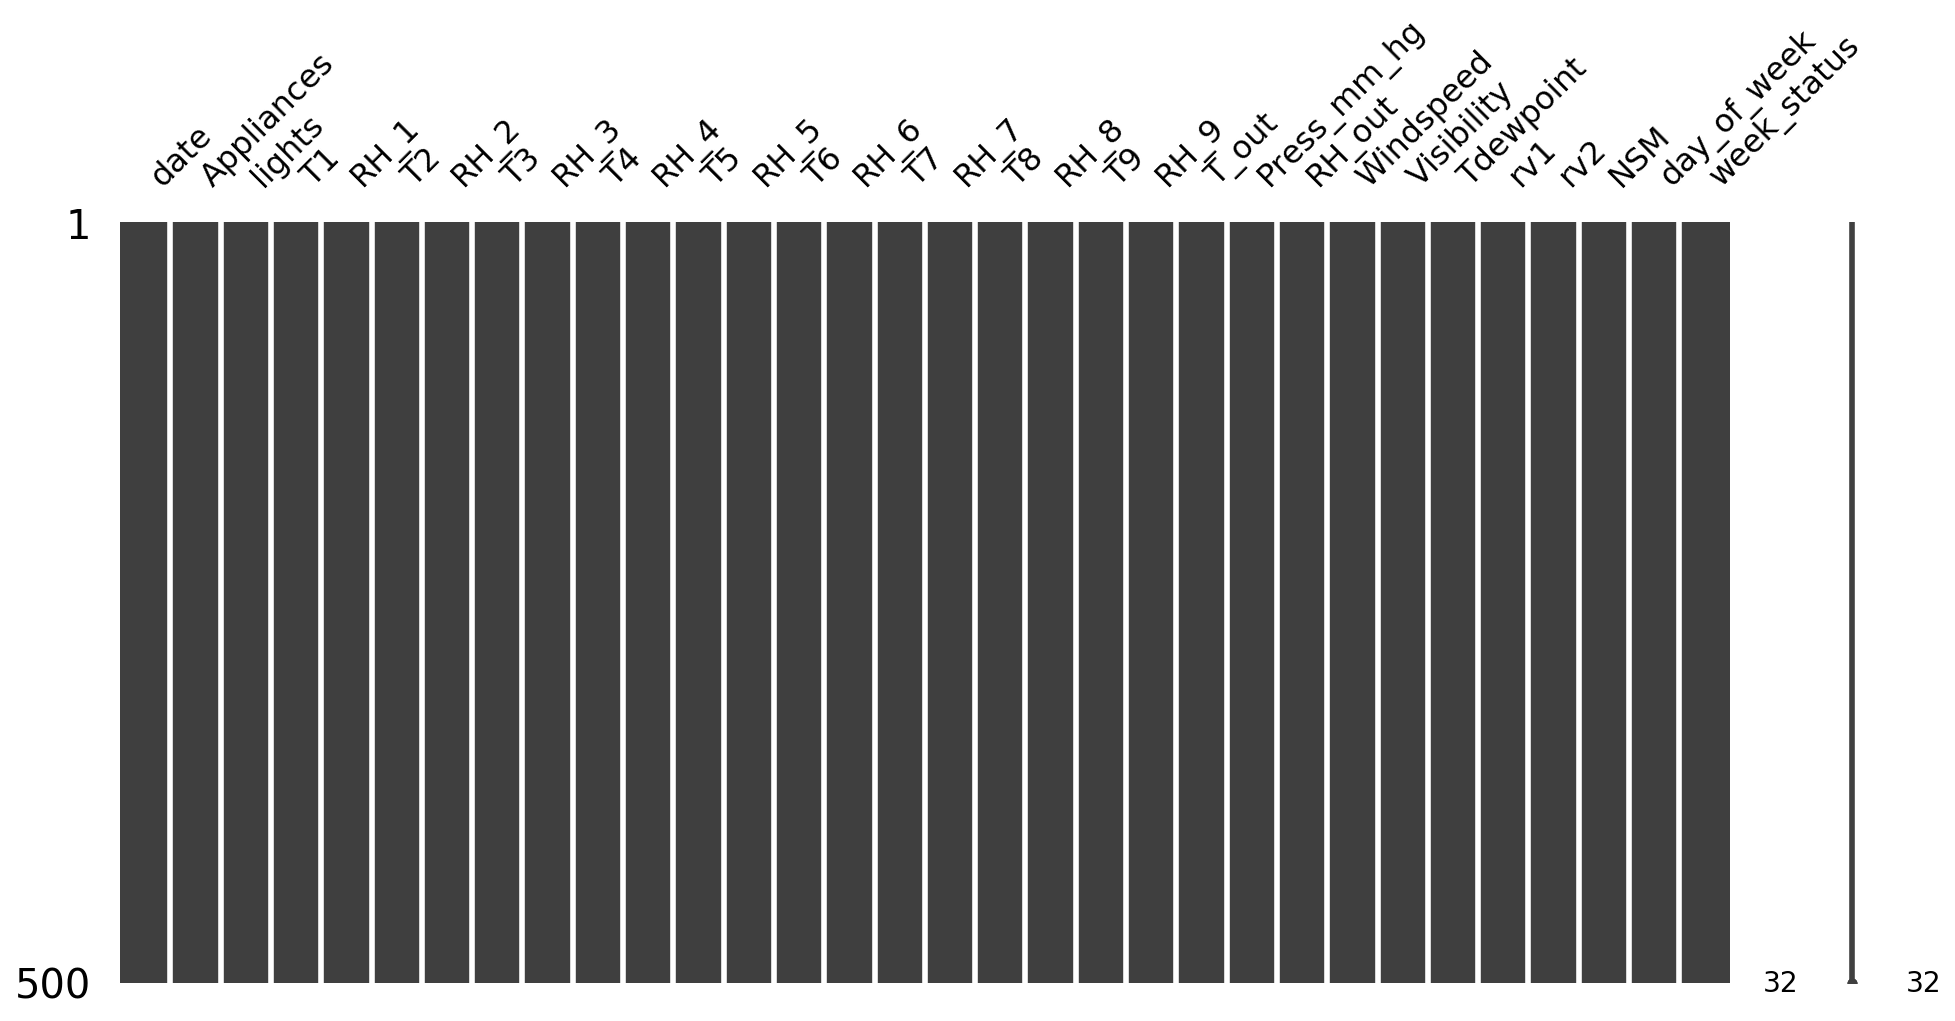

In [24]:
msno.matrix(df.sample(500),
            figsize=(16, 7),
            width_ratios=(15, 1));

## Correlation Analysis 

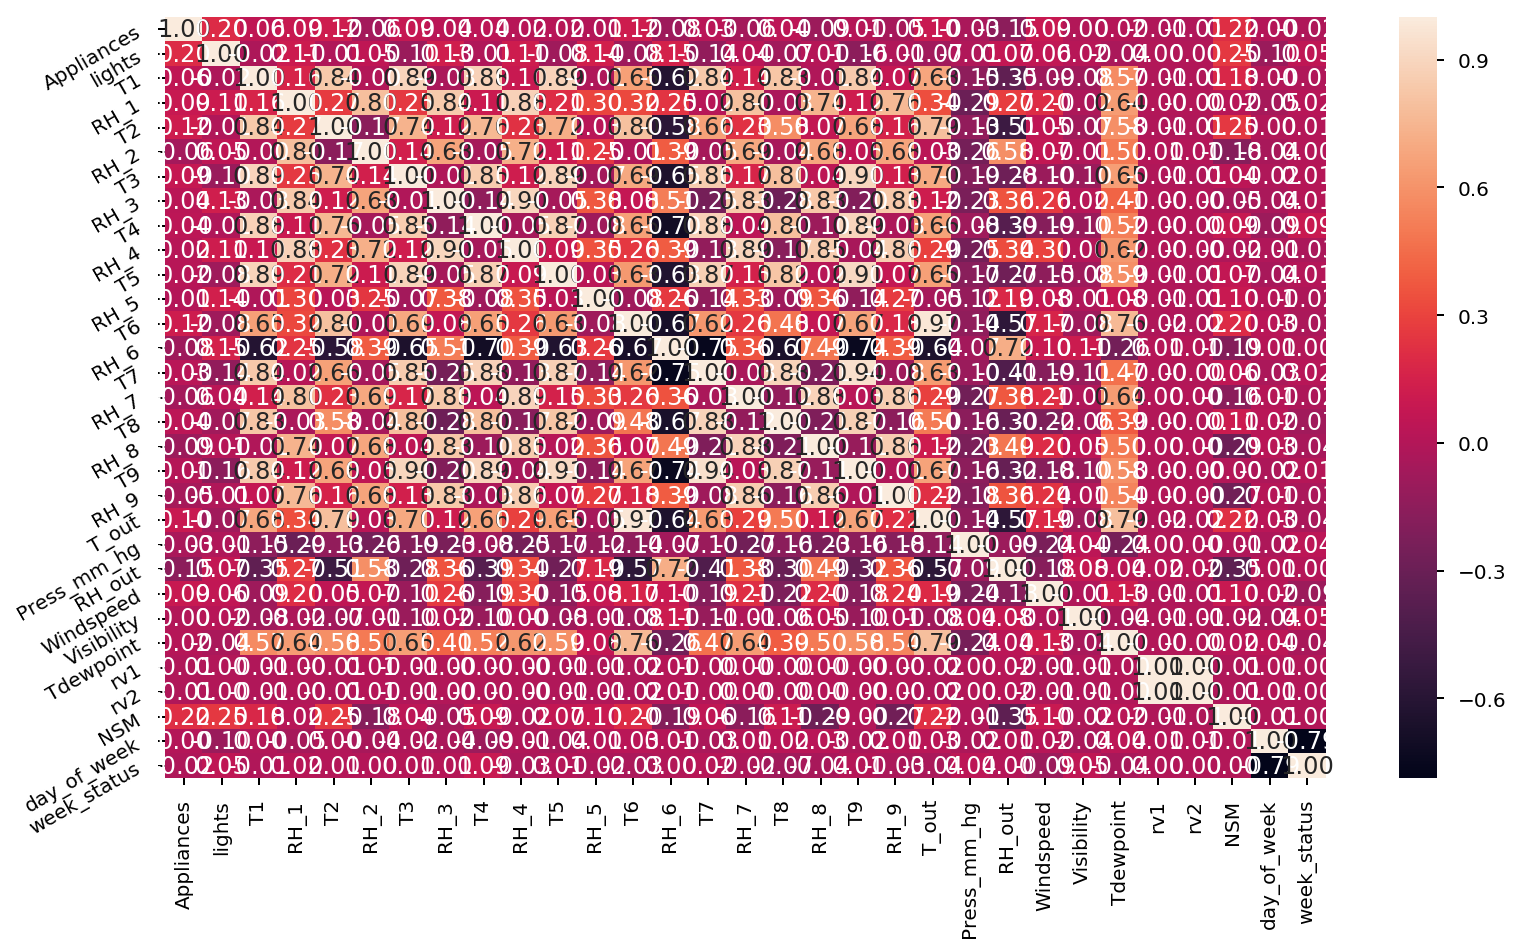

In [22]:
#Correlation and heat map
correlation = df.corr()
sns.set_context("notebook", font_scale = 1.0, rc = {"lines.linewidth" : 2.5})
plt.figure(figsize=(13, 7))
a = sns.heatmap(correlation,annot = True, fmt = '.2f')

rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

# Examine pair-wise Relationship

Creating new dataframe 

In [23]:
df_1 = df[['Appliances','T1','RH_1','T2','RH_2','T3','RH_3']]

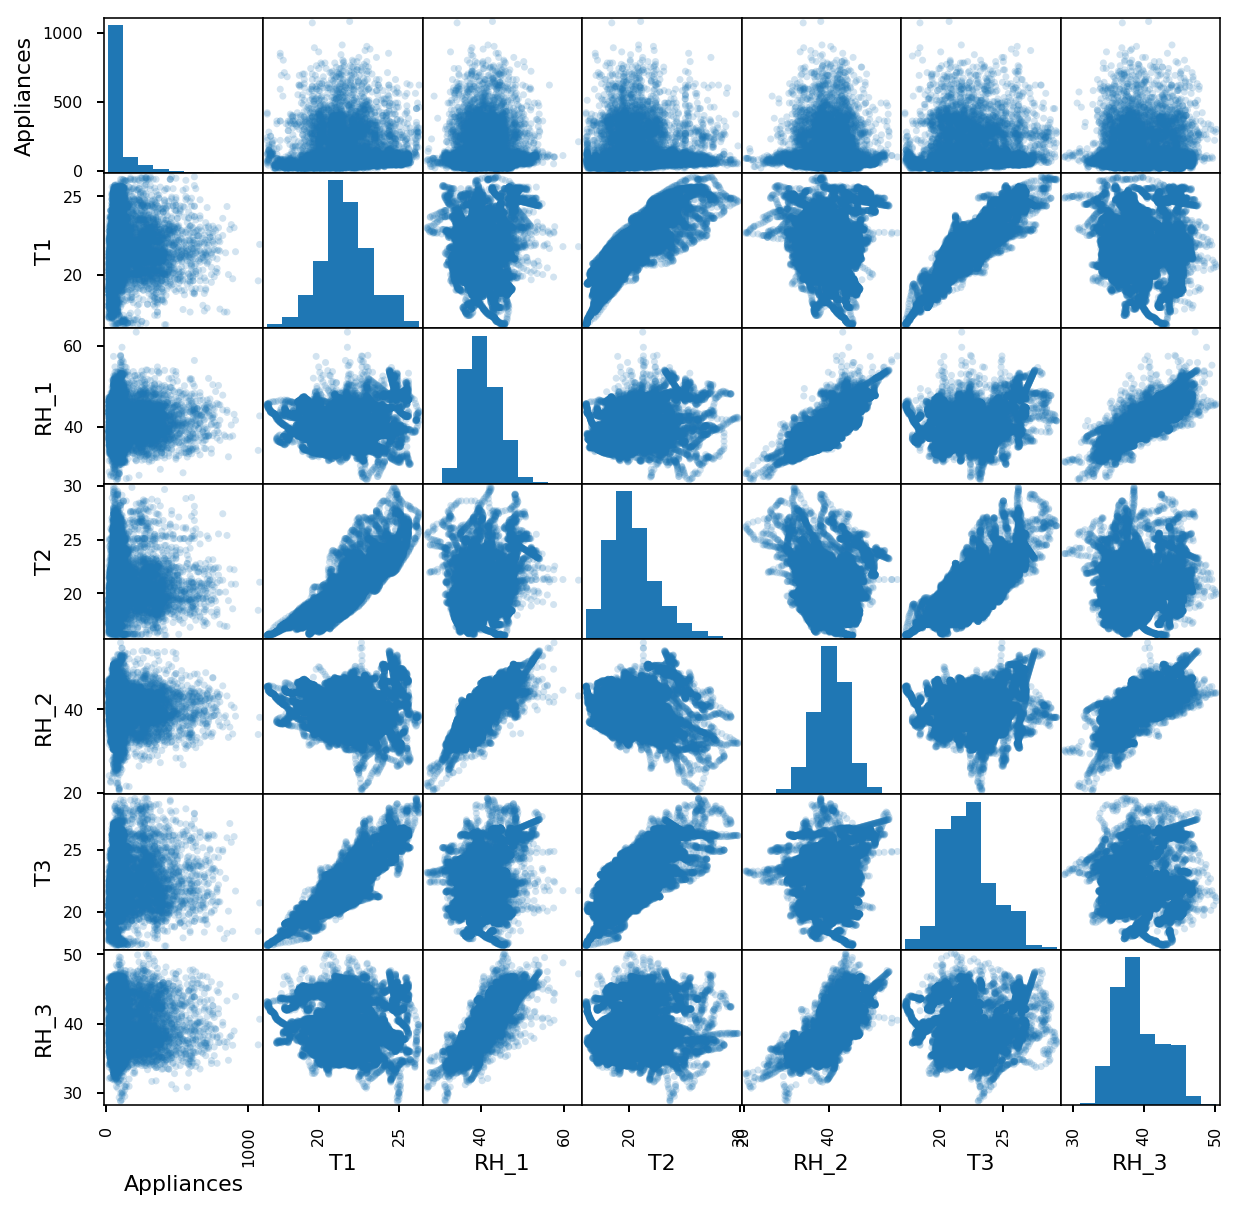

In [24]:
fig, ax= plt.subplots(figsize=(10 ,10))
scatter_matrix(df_1[['Appliances','T1','RH_1','T2','RH_2','T3','RH_3']],alpha=0.2,diagonal='hist',ax=ax);

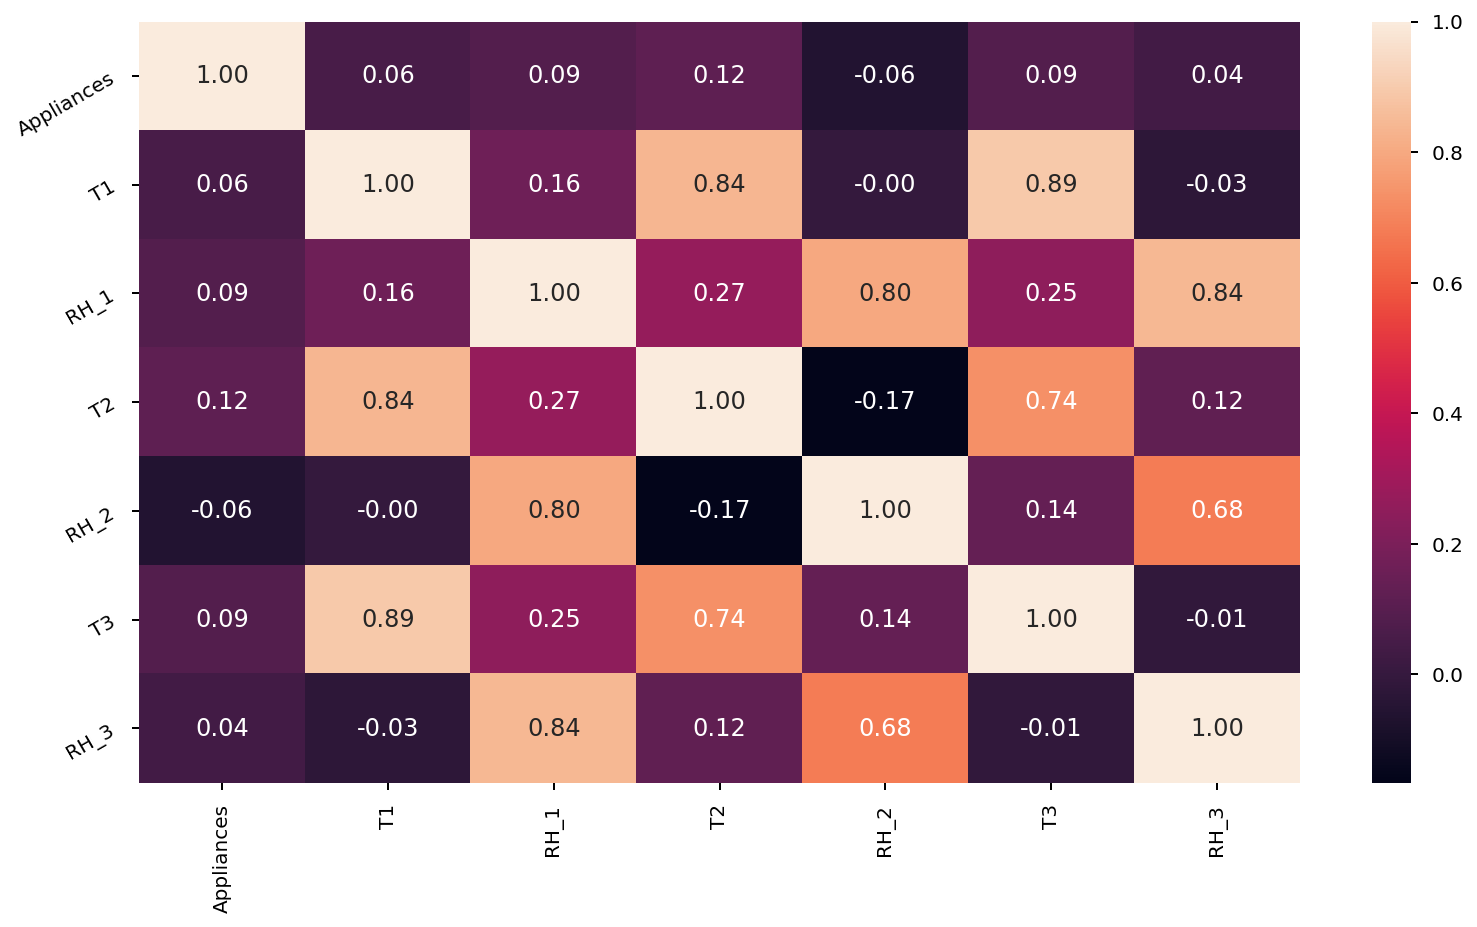

In [25]:
#Correlation and heat map
correlation = df_1.corr()
sns.set_context("notebook", font_scale = 1.0, rc = {"lines.linewidth" : 2.5})
plt.figure(figsize=(13, 7))
a = sns.heatmap(correlation,annot = True, fmt = '.2f')

rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

In [26]:
df_2 = df[['Appliances','T4','RH_4','T5','RH_5','T6','RH_6']]

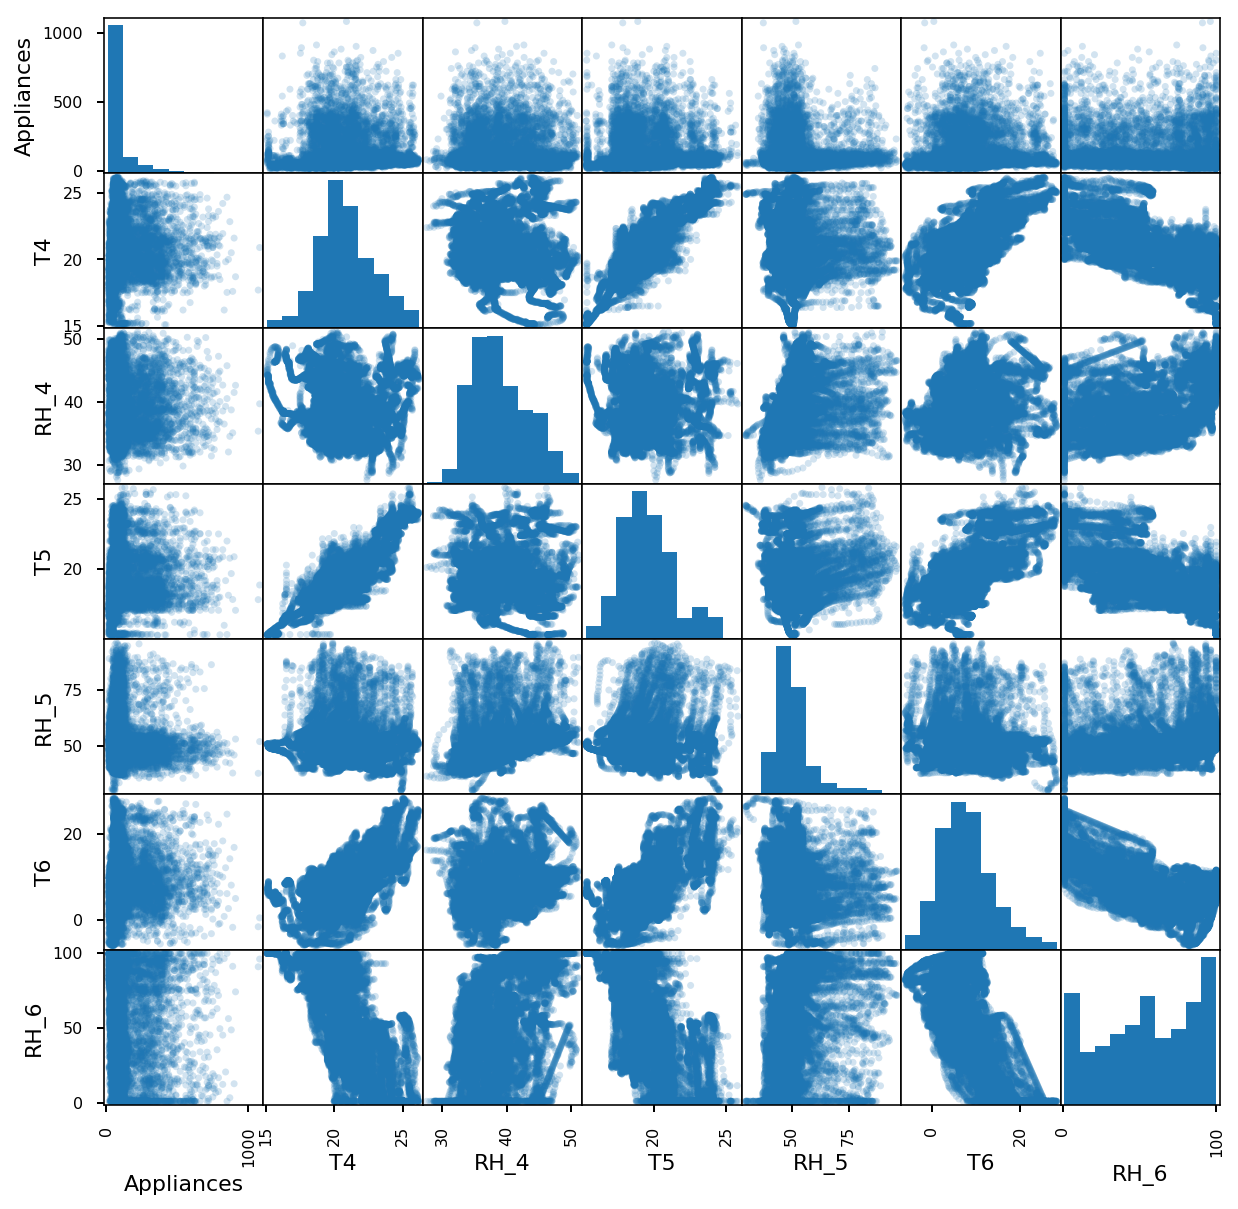

In [27]:
fig, ax= plt.subplots(figsize=(10 ,10))
scatter_matrix(df_2[['Appliances','T4','RH_4','T5','RH_5','T6','RH_6']],alpha=0.2,diagonal='hist',ax=ax);

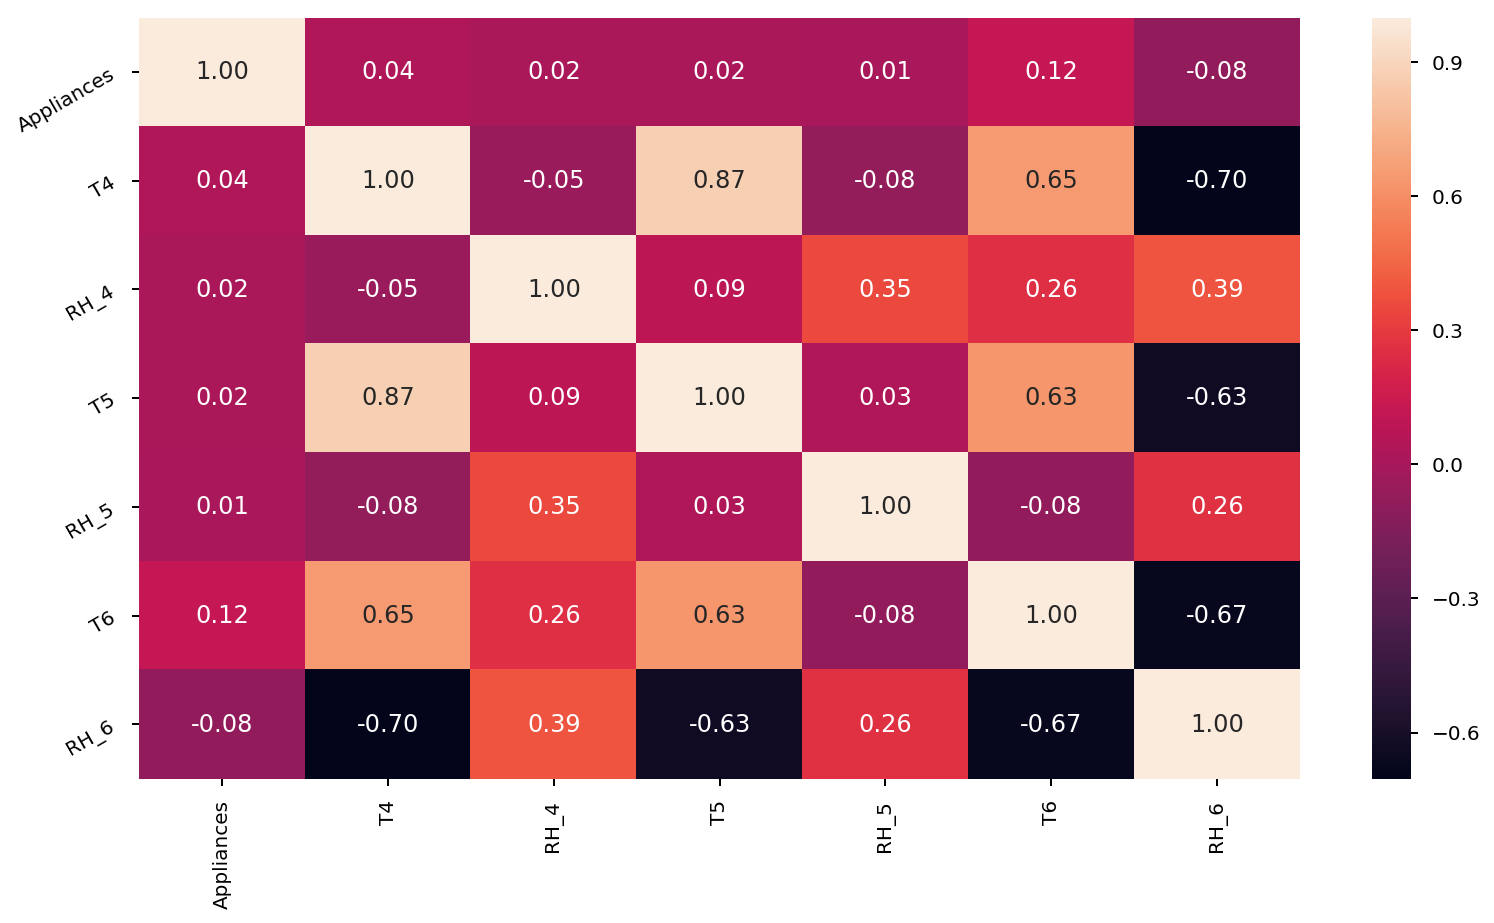

In [28]:
#Correlation and heat map
correlation = df_2.corr()
sns.set_context("notebook", font_scale = 1.0, rc = {"lines.linewidth" : 2.5})
plt.figure(figsize=(13, 7))
a = sns.heatmap(correlation,annot = True, fmt = '.2f')

rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

In [29]:
df_3=df[['Appliances','T7','RH_7','T8','RH_8','T9','RH_9']]

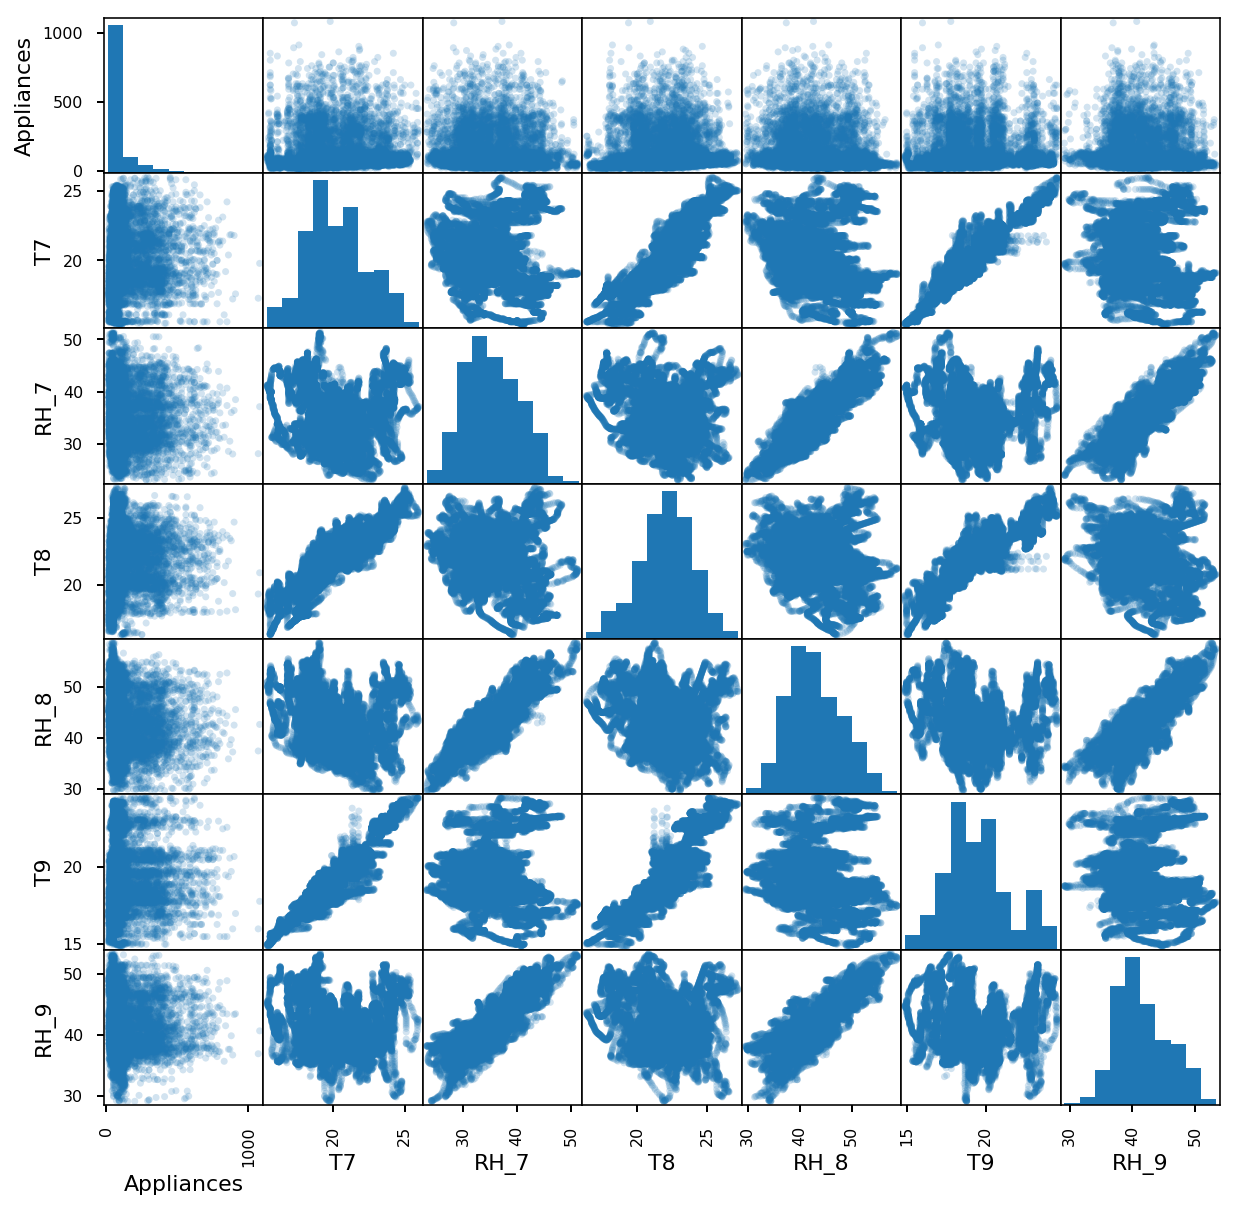

In [30]:
fig, ax= plt.subplots(figsize=(10 ,10))
scatter_matrix(df_3[['Appliances','T7','RH_7','T8','RH_8','T9','RH_9']],alpha=0.2,diagonal='hist',ax=ax);

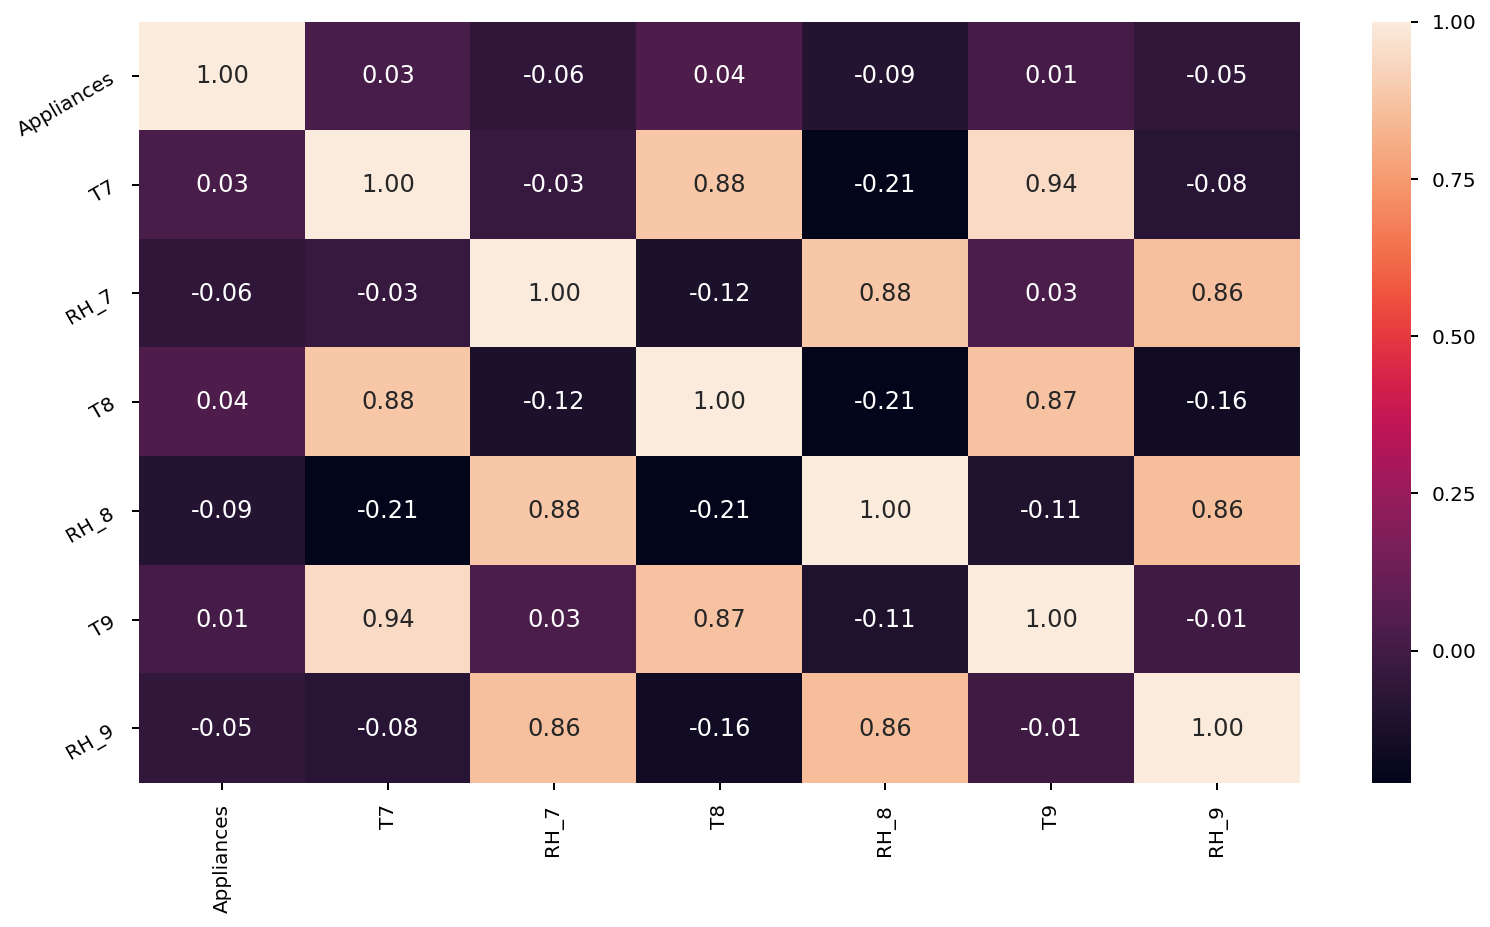

In [31]:
#Correlation and heat map
correlation = df_3.corr()
sns.set_context("notebook", font_scale = 1.0, rc = {"lines.linewidth" : 2.5})
plt.figure(figsize=(13, 7))
a = sns.heatmap(correlation,annot = True, fmt = '.2f')

rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

In [32]:
df_4 = df[['Appliances','T_out','Press_mm_hg','RH_out','Windspeed','Visibility','Tdewpoint']]

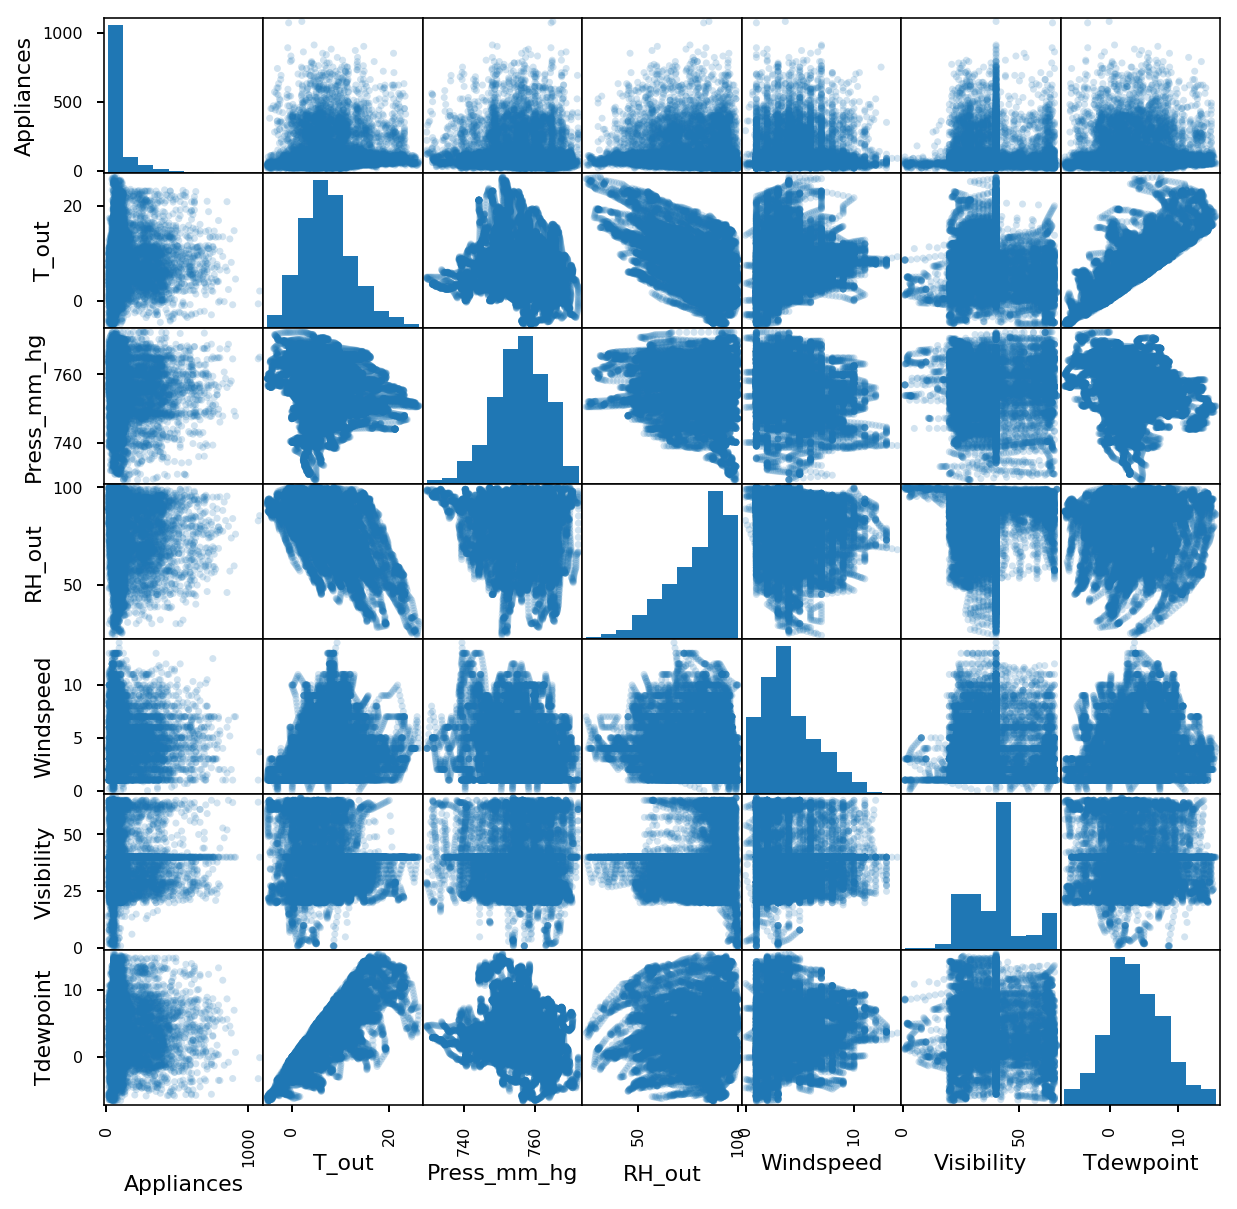

In [33]:
fig, ax= plt.subplots(figsize=(10 ,10))
scatter_matrix(df_4[['Appliances','T_out','Press_mm_hg','RH_out','Windspeed','Visibility','Tdewpoint']],alpha=0.2,diagonal='hist',ax=ax);

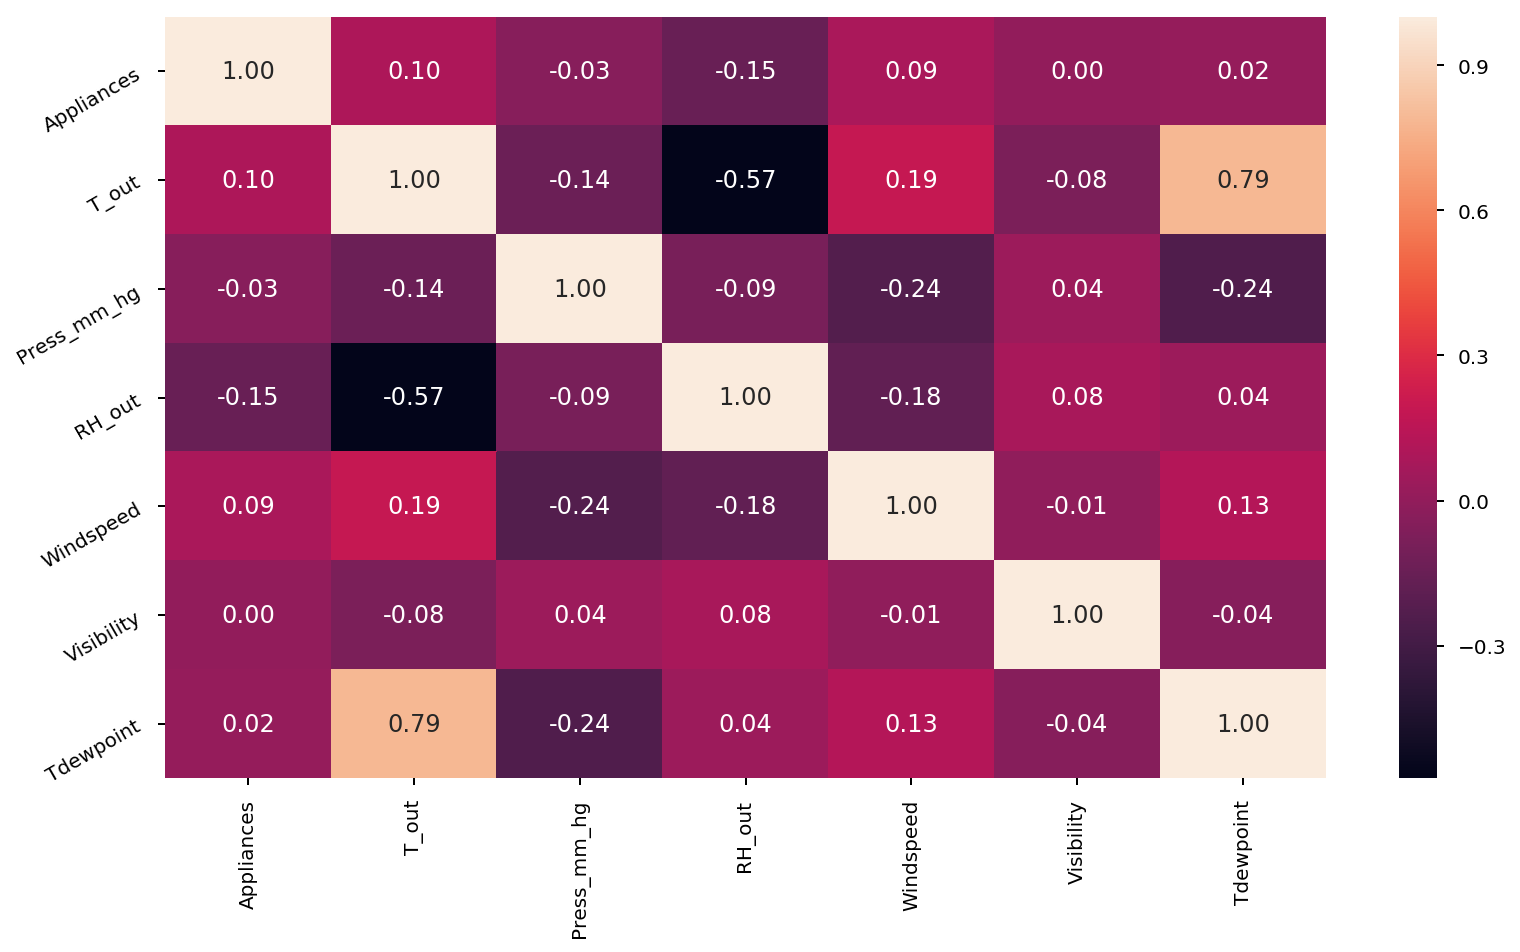

In [34]:
#Correlation and heat map
correlation = df_4.corr()
sns.set_context("notebook", font_scale = 1.0, rc = {"lines.linewidth" : 2.5})
plt.figure(figsize=(13, 7))
a = sns.heatmap(correlation,annot = True, fmt = '.2f')

rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

## Examine relationship between Consumption and day of the week

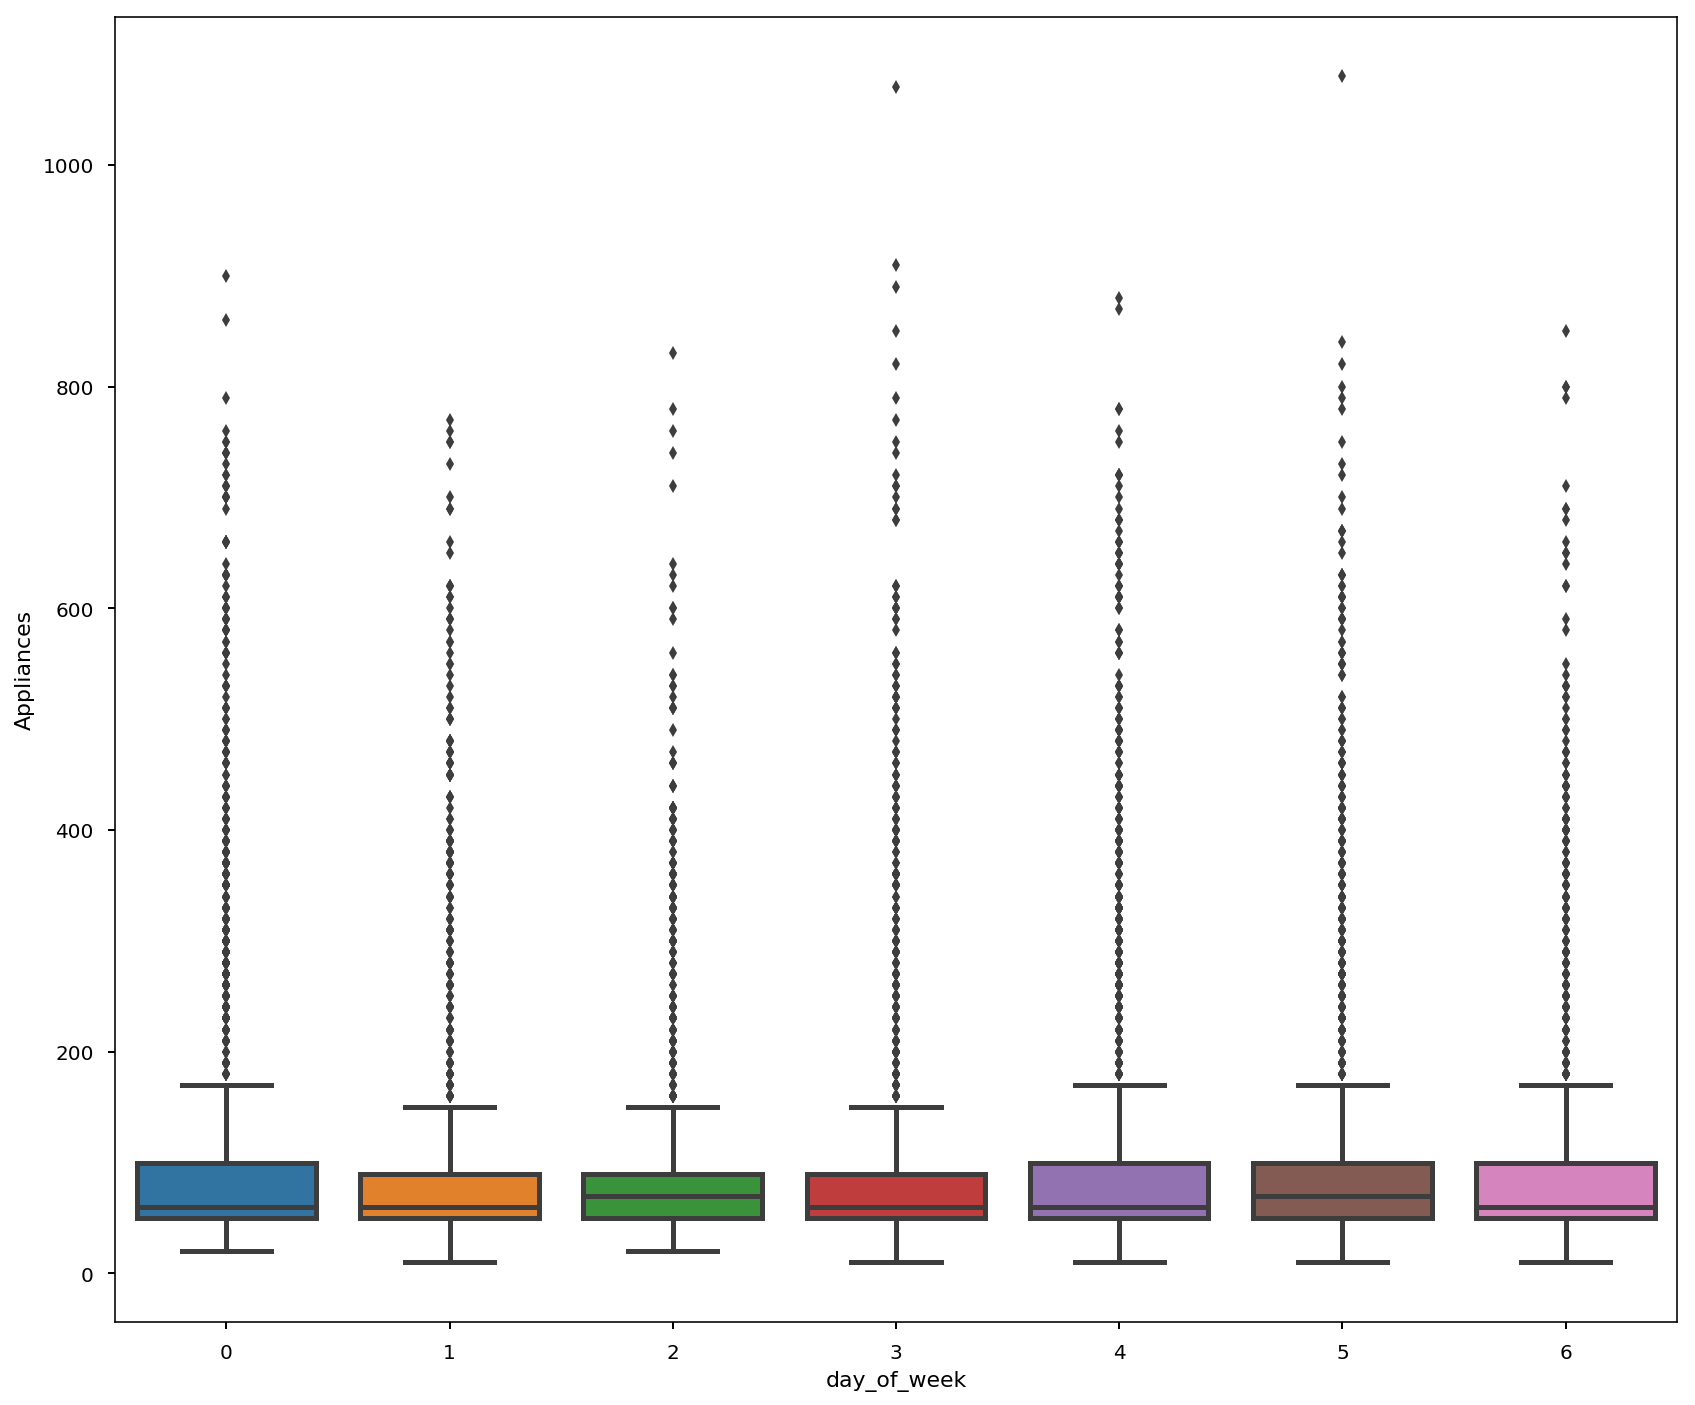

In [35]:
plt.figure(figsize=(14,12))
sns.boxplot(x='day_of_week', y='Appliances', data=df);

## Plotting Boxplots to observe the dispersion of the data and to check for outliers

{'boxes': [<matplotlib.lines.Line2D at 0x1f4dc327278>],
 'caps': [<matplotlib.lines.Line2D at 0x1f4dc327da0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1f4dc315b00>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1f4dc3156a0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1f4dc327400>,
  <matplotlib.lines.Line2D at 0x1f4dc327940>]}

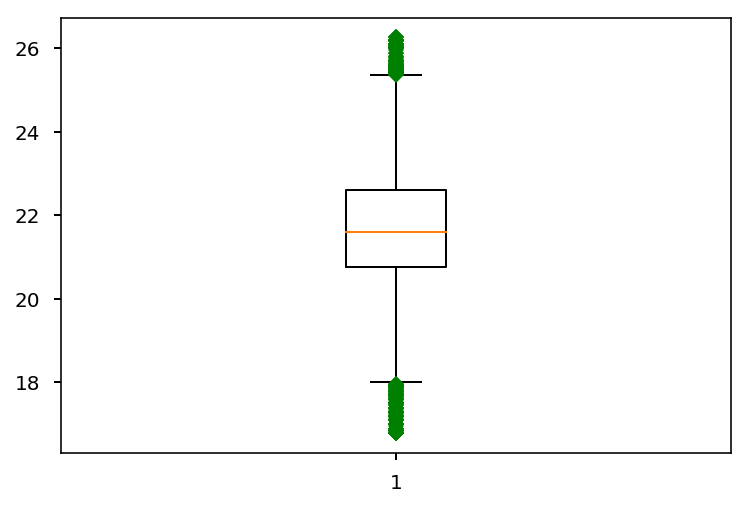

In [36]:
plt.figure()
plt.boxplot(df['T1'],0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x1f4db568160>],
 'caps': [<matplotlib.lines.Line2D at 0x1f4db568c88>,
 'fliers': [<matplotlib.lines.Line2D at 0x1f4db5539e8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1f4db553588>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1f4db5682e8>,
  <matplotlib.lines.Line2D at 0x1f4db568828>]}

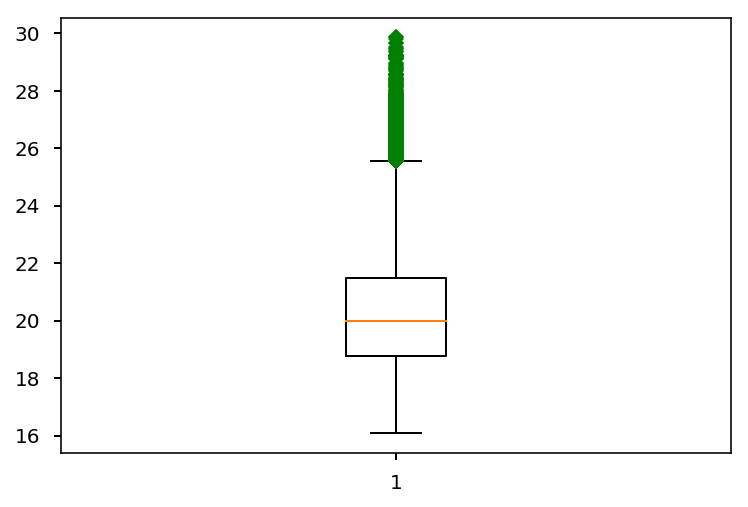

In [37]:
plt.figure()
plt.boxplot(df['T2'],0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x1f4d7507e10>],
 'caps': [<matplotlib.lines.Line2D at 0x1f4d7513978>,
 'fliers': [<matplotlib.lines.Line2D at 0x1f4d751a6d8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1f4d751a278>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1f4d7507f98>,
  <matplotlib.lines.Line2D at 0x1f4d7513518>]}

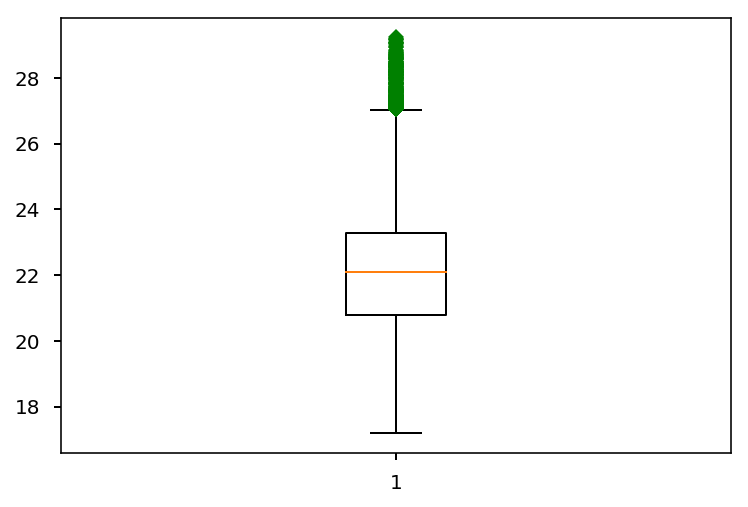

In [38]:
plt.figure()
plt.boxplot(df['T3'],0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x1f4d7ac1208>],
 'caps': [<matplotlib.lines.Line2D at 0x1f4d7ac1d30>,
 'fliers': [<matplotlib.lines.Line2D at 0x1f4d7acaa90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1f4d7aca630>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1f4d7ac1390>,
  <matplotlib.lines.Line2D at 0x1f4d7ac18d0>]}

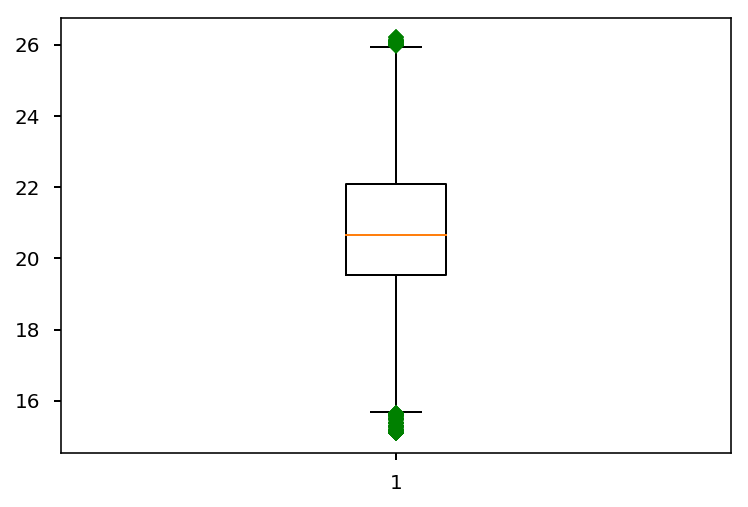

In [39]:
plt.figure()
plt.boxplot(df['T4'],0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x1f4d8100588>],
 'caps': [<matplotlib.lines.Line2D at 0x1f4d81090f0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1f4d8109e10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1f4d81099b0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1f4d8100710>,
  <matplotlib.lines.Line2D at 0x1f4d8100c50>]}

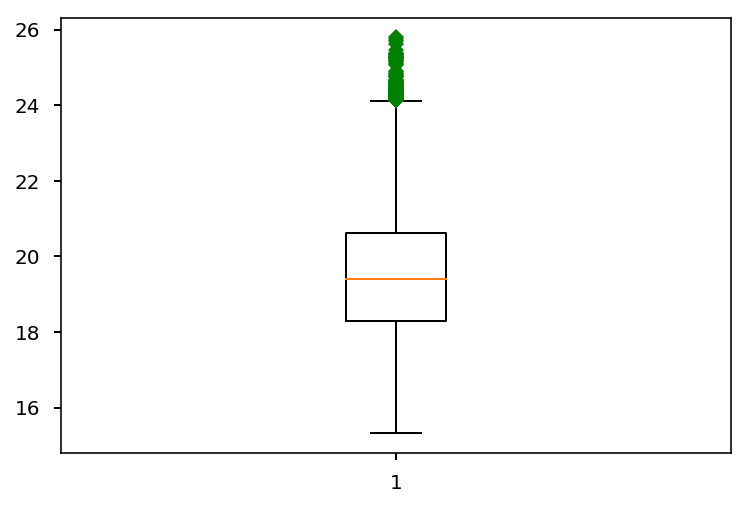

In [40]:
plt.figure()
plt.boxplot(df['T5'],0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x1f4d815f860>],
 'caps': [<matplotlib.lines.Line2D at 0x1f4d81663c8>,
 'fliers': [<matplotlib.lines.Line2D at 0x1f4d816f128>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1f4d8166c88>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1f4d815f9e8>,
  <matplotlib.lines.Line2D at 0x1f4d815ff28>]}

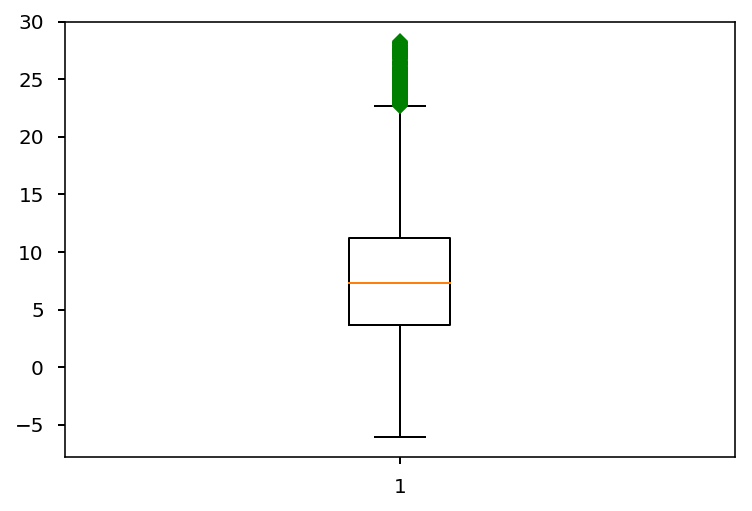

In [41]:
plt.figure()
plt.boxplot(df['T6'],0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x1f4d81c84a8>],
 'caps': [<matplotlib.lines.Line2D at 0x1f4d81c8fd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1f4d81d1d30>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1f4d81d18d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1f4d81c8630>,
  <matplotlib.lines.Line2D at 0x1f4d81c8b70>]}

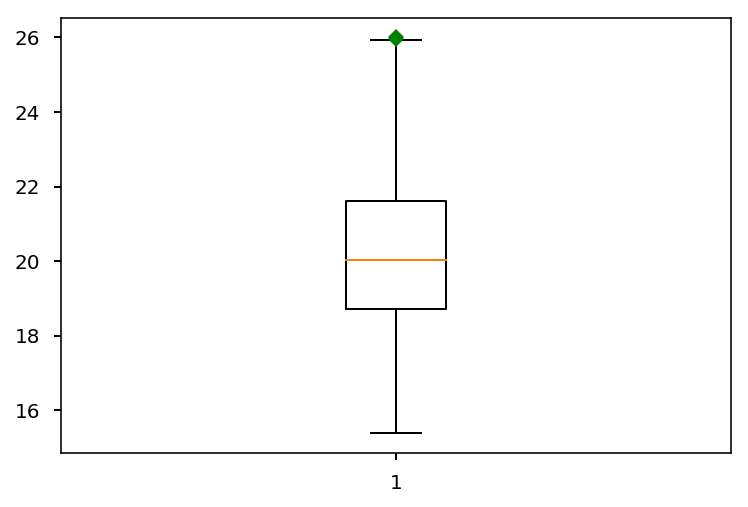

In [42]:
plt.figure()
plt.boxplot(df['T7'],0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x1f4d82897f0>],
 'caps': [<matplotlib.lines.Line2D at 0x1f4d8290358>,
 'fliers': [<matplotlib.lines.Line2D at 0x1f4d82980b8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1f4d8290c18>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1f4d8289978>,
  <matplotlib.lines.Line2D at 0x1f4d8289eb8>]}

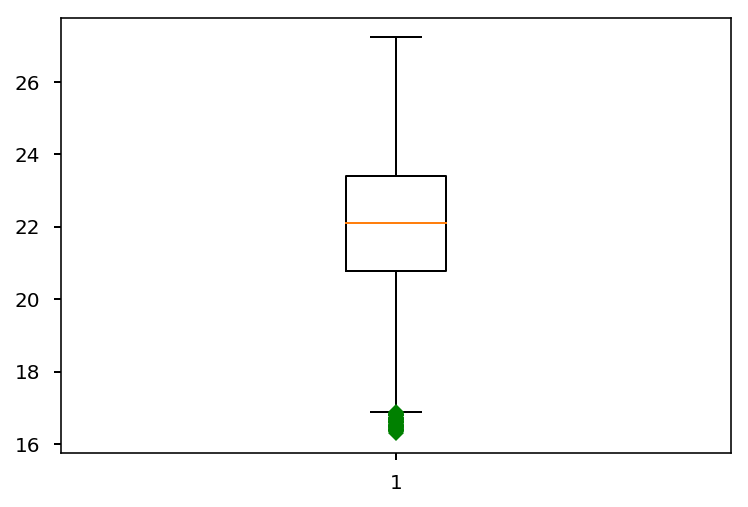

In [43]:
plt.figure()
plt.boxplot(df['T8'],0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x1f4d8385b38>],
 'caps': [<matplotlib.lines.Line2D at 0x1f4d83916a0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1f4d8399400>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1f4d8391f60>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1f4d8385cc0>,
  <matplotlib.lines.Line2D at 0x1f4d8391240>]}

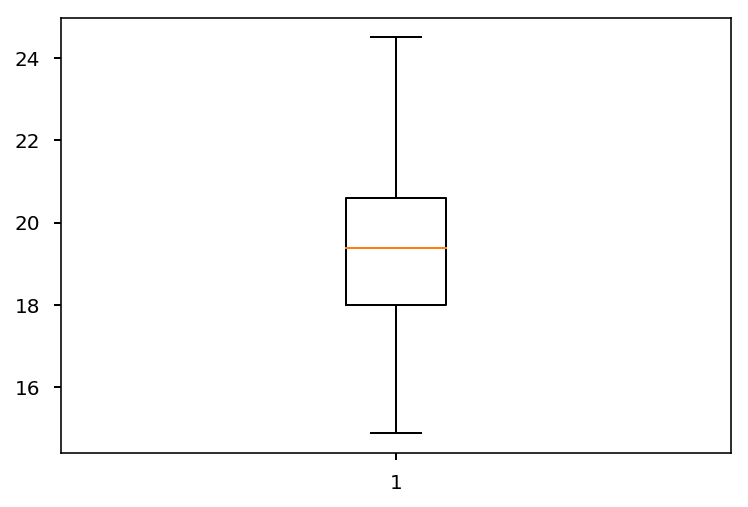

In [44]:
plt.figure()
plt.boxplot(df['T9'],0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x1f4d83e49e8>],
 'caps': [<matplotlib.lines.Line2D at 0x1f4d83ed550>,
 'fliers': [<matplotlib.lines.Line2D at 0x1f4d83f72b0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1f4d83ede10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1f4d83e4b70>,
  <matplotlib.lines.Line2D at 0x1f4d83ed0f0>]}

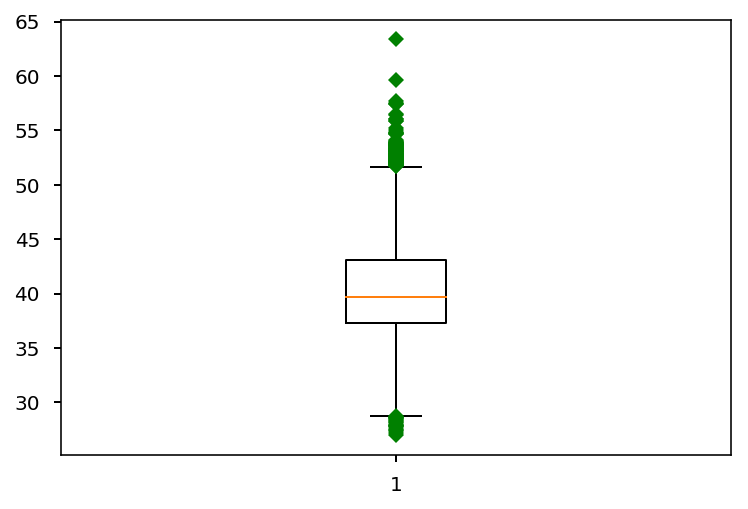

In [45]:
plt.figure()
plt.boxplot(df['RH_1'],0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x1f4d848b748>],
 'caps': [<matplotlib.lines.Line2D at 0x1f4d84962b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1f4d8496fd0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1f4d8496b70>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1f4d848b8d0>,
  <matplotlib.lines.Line2D at 0x1f4d848be10>]}

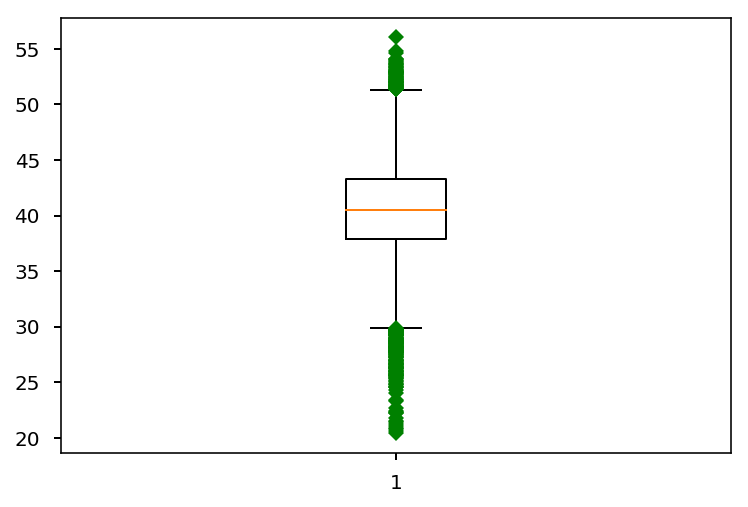

In [46]:
plt.figure()
plt.boxplot(df['RH_2'],0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x1f4d85354e0>],
 'caps': [<matplotlib.lines.Line2D at 0x1f4d853d048>,
 'fliers': [<matplotlib.lines.Line2D at 0x1f4d853dd68>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1f4d853d908>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1f4d8535668>,
  <matplotlib.lines.Line2D at 0x1f4d8535ba8>]}

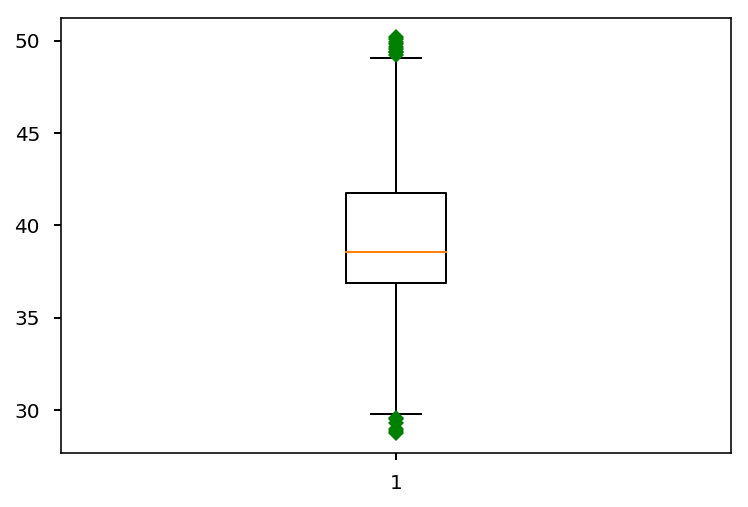

In [47]:
plt.figure()
plt.boxplot(df['RH_3'],0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x1f4d8616358>],
 'caps': [<matplotlib.lines.Line2D at 0x1f4d8616e80>,
 'fliers': [<matplotlib.lines.Line2D at 0x1f4d861cbe0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1f4d861c780>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1f4d86164e0>,
  <matplotlib.lines.Line2D at 0x1f4d8616a20>]}

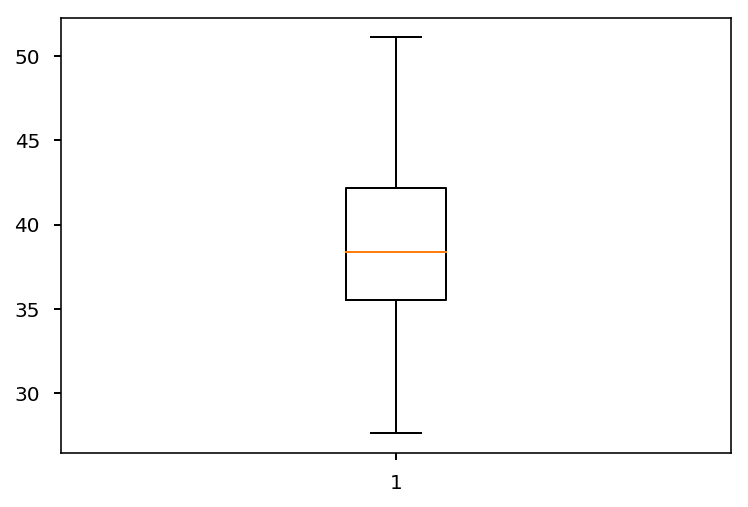

In [48]:
plt.figure()
plt.boxplot(df['RH_4'],0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x1f4d8834128>],
 'caps': [<matplotlib.lines.Line2D at 0x1f4d8834c50>,
 'fliers': [<matplotlib.lines.Line2D at 0x1f4d883d9b0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1f4d883d550>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1f4d88342b0>,
  <matplotlib.lines.Line2D at 0x1f4d88347f0>]}

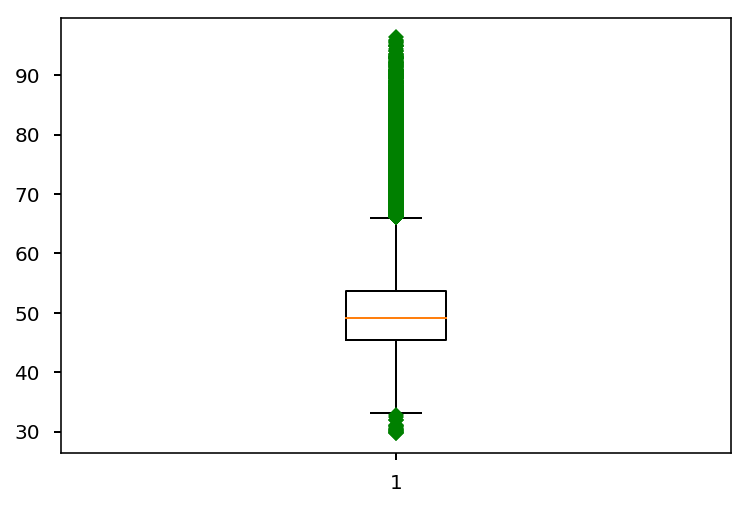

In [49]:
plt.figure()
plt.boxplot(df['RH_5'],0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x1f4d88949e8>],
 'caps': [<matplotlib.lines.Line2D at 0x1f4d889c550>,
 'fliers': [<matplotlib.lines.Line2D at 0x1f4d88a52b0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1f4d889ce10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1f4d8894b70>,
  <matplotlib.lines.Line2D at 0x1f4d889c0f0>]}

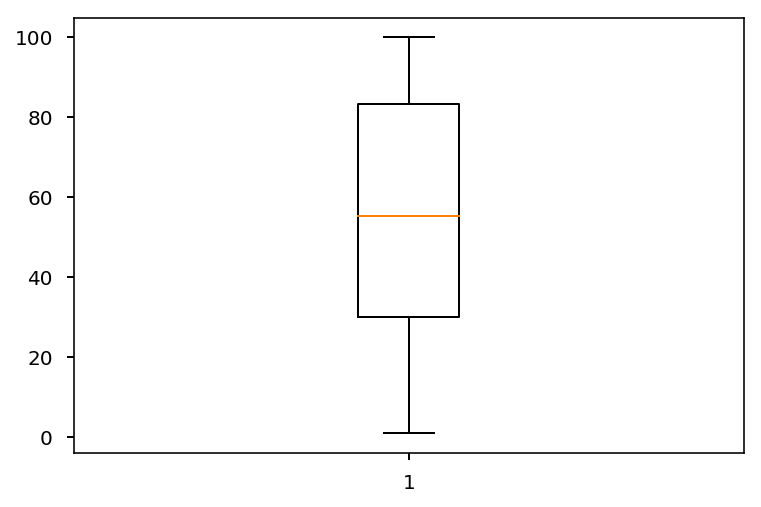

In [50]:
plt.figure()
plt.boxplot(df['RH_6'],0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x1f4d9093cc0>],
 'caps': [<matplotlib.lines.Line2D at 0x1f4d909d828>,
 'fliers': [<matplotlib.lines.Line2D at 0x1f4d90a6588>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1f4d90a6128>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1f4d9093e48>,
  <matplotlib.lines.Line2D at 0x1f4d909d3c8>]}

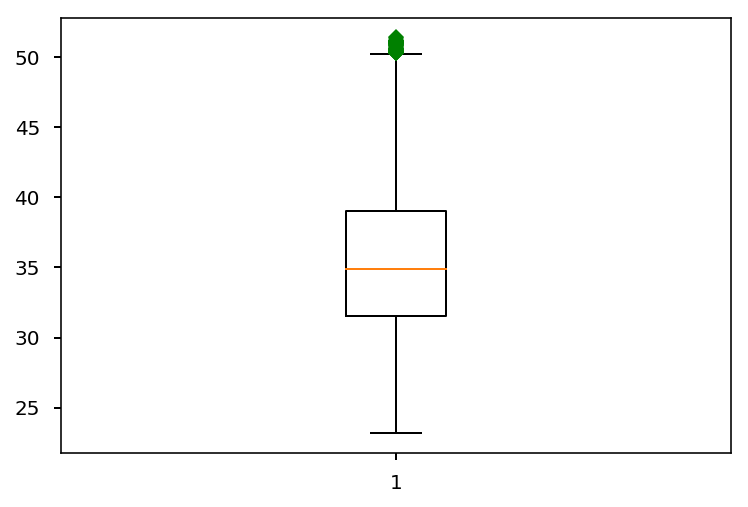

In [51]:
plt.figure()
plt.boxplot(df['RH_7'],0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x1f4dbb3d080>],
 'caps': [<matplotlib.lines.Line2D at 0x1f4dbb3dba8>,
 'fliers': [<matplotlib.lines.Line2D at 0x1f4dbb45908>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1f4dbb454a8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1f4dbb3d208>,
  <matplotlib.lines.Line2D at 0x1f4dbb3d748>]}

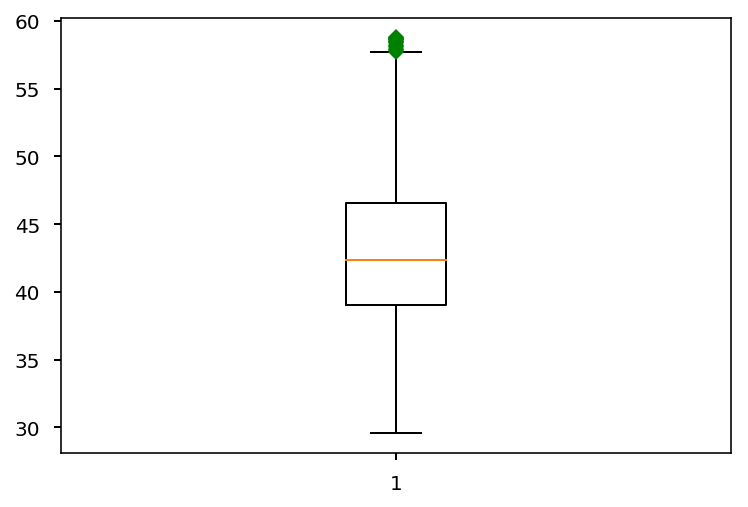

In [52]:
plt.figure()
plt.boxplot(df['RH_8'],0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x1f4dbb9c898>],
 'caps': [<matplotlib.lines.Line2D at 0x1f4dbba4400>,
 'fliers': [<matplotlib.lines.Line2D at 0x1f4dbbac160>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1f4dbba4cc0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1f4dbb9ca20>,
  <matplotlib.lines.Line2D at 0x1f4dbb9cf60>]}

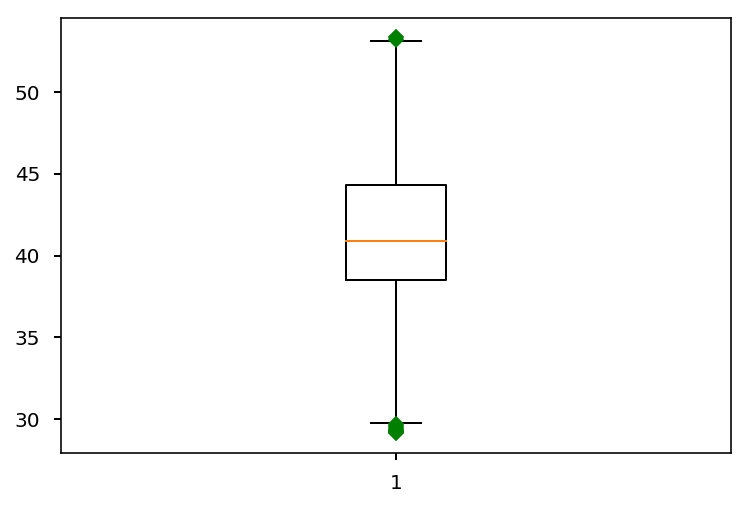

In [53]:
plt.figure()
plt.boxplot(df['RH_9'],0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x1f4db4bf668>],
 'caps': [<matplotlib.lines.Line2D at 0x1f4d8437c50>,
 'fliers': [<matplotlib.lines.Line2D at 0x1f4d8437f28>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1f4d84377f0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1f4db4bf240>,
  <matplotlib.lines.Line2D at 0x1f4db4bfd68>]}

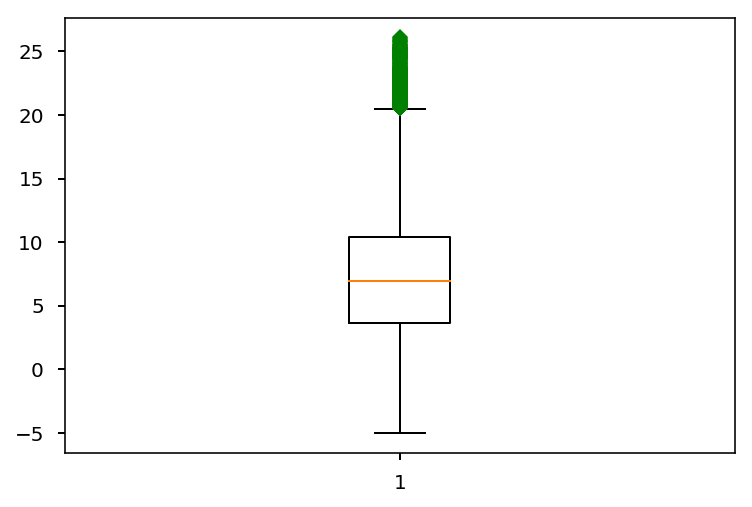

In [54]:
plt.figure()
plt.boxplot(df['T_out'],0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x1f4db48a390>],
 'caps': [<matplotlib.lines.Line2D at 0x1f4db48f2b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1f4dc3dfb38>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1f4db275f28>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1f4d8055b00>,
  <matplotlib.lines.Line2D at 0x1f4db48fa20>]}

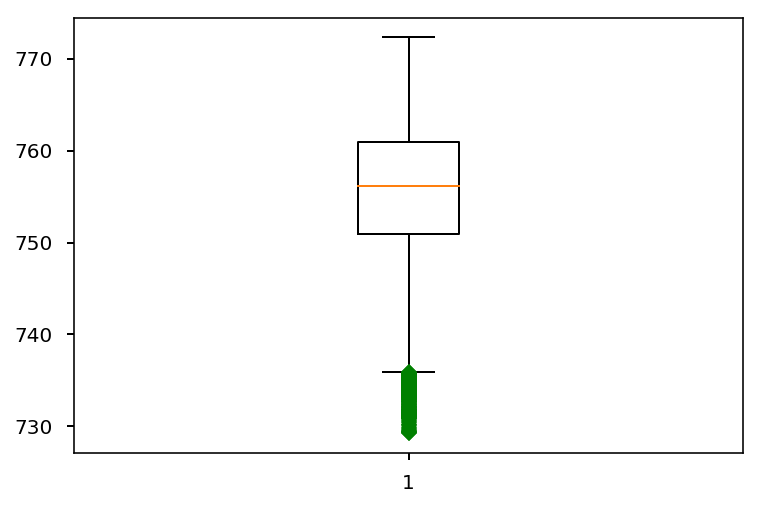

In [55]:
plt.figure()
plt.boxplot(df['Press_mm_hg'],0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x1f4dc3b19e8>],
 'caps': [<matplotlib.lines.Line2D at 0x1f4d728cba8>,
 'fliers': [<matplotlib.lines.Line2D at 0x1f4d8442a58>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1f4d8442c50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1f4d8019320>,
  <matplotlib.lines.Line2D at 0x1f4d88c53c8>]}

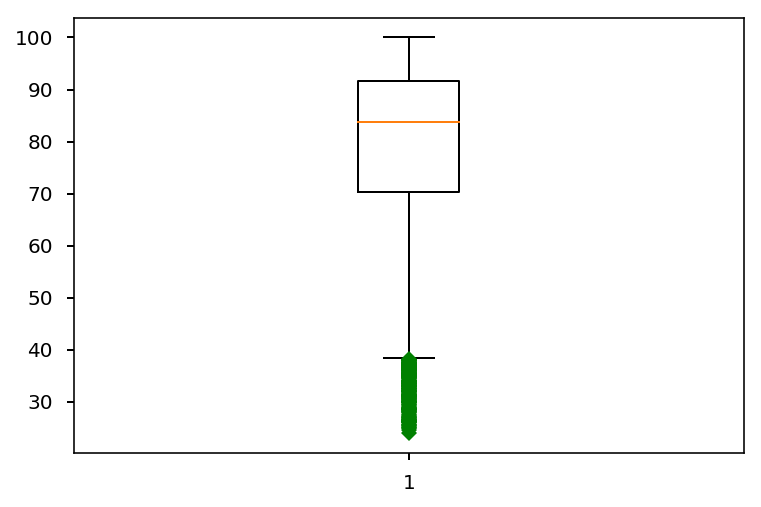

In [56]:
plt.figure()
plt.boxplot(df['RH_out'],0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x1f4db4de518>],
 'caps': [<matplotlib.lines.Line2D at 0x1f4db4c1080>,
 'fliers': [<matplotlib.lines.Line2D at 0x1f4db4c1da0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1f4db4c1940>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1f4db4de6a0>,
  <matplotlib.lines.Line2D at 0x1f4db4debe0>]}

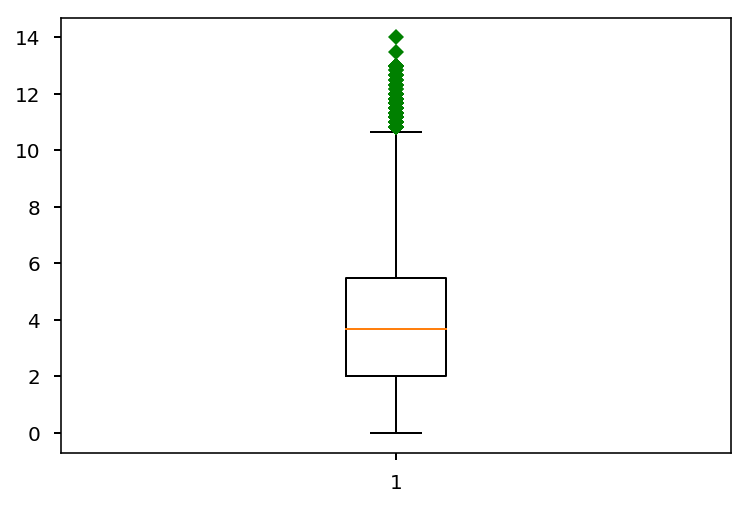

In [57]:
plt.figure()
plt.boxplot(df['Windspeed'],0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x1f4dc9f8128>],
 'caps': [<matplotlib.lines.Line2D at 0x1f4dc9f8c50>,
 'fliers': [<matplotlib.lines.Line2D at 0x1f4dc9ff9b0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1f4dc9ff550>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1f4dc9f82b0>,
  <matplotlib.lines.Line2D at 0x1f4dc9f87f0>]}

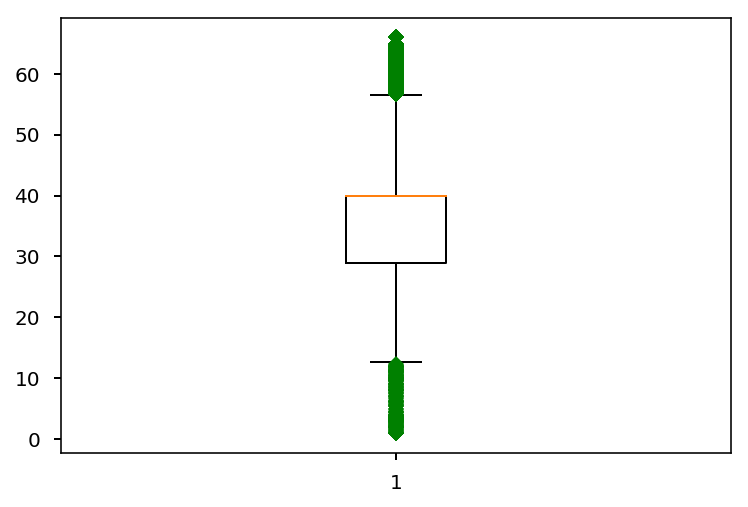

In [58]:
plt.figure()
plt.boxplot(df['Visibility'],0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x1f4dca55908>],
 'caps': [<matplotlib.lines.Line2D at 0x1f4dca5f470>,
 'fliers': [<matplotlib.lines.Line2D at 0x1f4dca651d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1f4dca5fd30>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1f4dca55a90>,
  <matplotlib.lines.Line2D at 0x1f4dca55fd0>]}

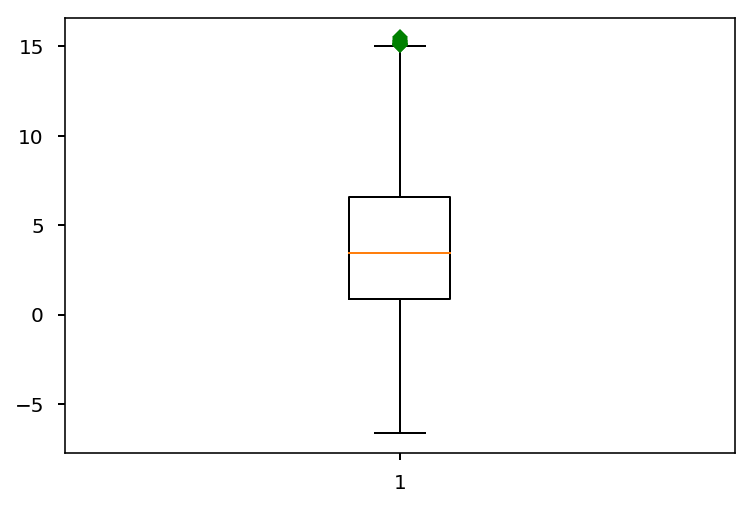

In [59]:
plt.figure()
plt.boxplot(df['Tdewpoint'],0,'gD')

From the above plots we concluded that the data is widely spread above the median which is clear indication of outliers

# Now Detecting outliers for each variable

To detect outliers in the dataset we will proceed with the following steps
>1. Arrange all the dataset points and calculate median
>2. Calculate the upper quartile
>3. Calculate the lower quartile
>> Since the above three aspects are given in the dataset
>4. Calculate the Interquartile Range
>> It is the product of difference of the upper quartile and lower quartile and numeric value of 1.5
>5. Calculate the inner fences for the dataset
>> It is set of numerical boundaries which is classified as major and minor outlier
>>>Major outlier = Upper Quartile + Interquartile rannge
>>>| Minor outlier = Lower Quartlie - Interquartile rannge

Table calculating outliers for each variable
<table>
    <thead class="valign-top">
        <tr>
            <th scope="col" class="rowsep-1 align-left">Variables</th>
            <th scope="col" class="rowsep-1 align-left">Upper Quartile</th>
            <th scope="col" class="rowsep-1 align-left">Lower Quartile</th>
            <th scope="col" class="rowsep-1 align-left">Interquartile Range</th>
            <th scope="col" class="rowsep-1 align-left">Major Outlier</th>
            <th scope="col" class="rowsep-1 align-left">Minor Outlier</th>
        </tr>
    </thead>
    <tbody>
        <tr>
        <th class="align-left" scope="row">T1</th>
            <td class="align-left">22.6</td>
            <td class="align-left">20.73</td>
            <td class="align-left">2.805</td>
            <td class="align-left">24.80</td>
            <td class="align-left">18.40</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">RH_1</th>
            <td class="align-left">43.09</td>
            <td class="align-left">37.36</td>
            <td class="align-left">8.595</td>
            <td class="align-left">51.25</td>
            <td class="align-left">28.50</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">T2</th>
            <td class="align-left">21.50</td>
            <td class="align-left">18.82</td>
            <td class="align-left">4.02</td>
            <td class="align-left">24.30</td>
            <td class="align-left">14.80</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">RH_2</th>
            <td class="align-left">43.29</td>
            <td class="align-left">37.90</td>
            <td class="align-left">8.08</td>
            <td class="align-left">50.50</td>
            <td class="align-left">32</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">T3</th>
            <td class="align-left">23.29</td>
            <td class="align-left">20.79</td>
            <td class="align-left">3.75</td>
            <td class="align-left">26.20</td>
            <td class="align-left">17.04</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">RH_3</th>
            <td class="align-left">41.76</td>
            <td class="align-left">36.90</td>
            <td class="align-left">7.29</td>
            <td class="align-left">46.50</td>
            <td class="align-left">30</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">T4</th>
            <td class="align-left">22.10</td>
            <td class="align-left">19.50</td>
            <td class="align-left">3.90</td>
            <td class="align-left">24.50</td>
            <td class="align-left">16.50</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">RH_4</th>
            <td class="align-left">42.13</td>
            <td class="align-left">35.53</td>
            <td class="align-left">9.90</td>
            <td class="align-left">49</td>
            <td class="align-left">25.60</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">T5</th>
            <td class="align-left">20.60</td>
            <td class="align-left">18.26</td>
            <td class="align-left">3.51</td>
            <td class="align-left">22.80</td>
            <td class="align-left">14.75</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">RH_5</th>
            <td class="align-left">53.66</td>
            <td class="align-left">45.40</td>
            <td class="align-left">12.39</td>
            <td class="align-left">62.80</td>
            <td class="align-left">34</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">T6</th>
            <td class="align-left">11.24</td>
            <td class="align-left">3.65</td>
            <td class="align-left">11.38</td>
            <td class="align-left">18</td>
            <td class="align-left">-7.73</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">RH_6</th>
            <td class="align-left">83.32</td>
            <td class="align-left">30.09</td>
            <td class="align-left">79.84</td>
            <td class="align-left">163.16</td>
            <td class="align-left">-49.75</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">T7</th>
            <td class="align-left">21.60</td>
            <td class="align-left">18.70</td>
            <td class="align-left">4.35</td>
            <td class="align-left">25.90</td>
            <td class="align-left">14.35</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">RH_7</th>
            <td class="align-left">39</td>
            <td class="align-left">31.50</td>
            <td class="align-left">11.25</td>
            <td class="align-left">47</td>
            <td class="align-left">20.25</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">T8</th>
            <td class="align-left">23.39</td>
            <td class="align-left">20.79</td>
            <td class="align-left">3.90</td>
            <td class="align-left">27.29</td>
            <td class="align-left">17.20</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">RH_8</th>
            <td class="align-left">46.56</td>
            <td class="align-left">39.06</td>
            <td class="align-left">11.25</td>
            <td class="align-left">54.70</td>
            <td class="align-left">27.81</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">T9</th>
            <td class="align-left">20.60</td>
            <td class="align-left">18</td>
            <td class="align-left">3.90</td>
            <td class="align-left">23.60</td>
            <td class="align-left">14.10</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">RH_9</th>
            <td class="align-left">44.36</td>
            <td class="align-left">38.50</td>
            <td class="align-left">8.79</td>
            <td class="align-left">50.50</td>
            <td class="align-left">32</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">T_out</th>
            <td class="align-left">10.40</td>
            <td class="align-left">3.66</td>
            <td class="align-left">10.11</td>
            <td class="align-left">17.50</td>
            <td class="align-left">-6.45</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">RH_out</th>
            <td class="align-left">91.66</td>
            <td class="align-left">70</td>
            <td class="align-left">32.49</td>
            <td class="align-left">124.15</td>
            <td class="align-left">46</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">Press_mm_hg</th>
            <td class="align-left">76.093</td>
            <td class="align-left">750.86</td>
            <td class="align-left">15.105</td>
            <td class="align-left">776.035</td>
            <td class="align-left">736</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">Tdewpoint</th>
            <td class="align-left">6.53</td>
            <td class="align-left">0.9</td>
            <td class="align-left">8.445</td>
            <td class="align-left">12.50</td>
            <td class="align-left">-7.54</td>
         </tr>
            
        




# Removing Outliers from specific variables

In [60]:
#dropping outliers from T1
df= df.drop(df[(df['T1']>24.80) | (df['T1']<18.40)].index)

In [61]:
#dropping outliers from RH_1
df= df.drop(df[(df['RH_1']>51.25) | (df['RH_1']<28.50)].index)

In [62]:
#dropping Outliers from T2
df= df.drop(df[df['T2']>24.30].index)

In [63]:
#dropping outliers from RH_2
df= df.drop(df[(df['RH_2']>50.50) | (df['RH_2']<32)].index)

In [64]:
#dropping outliers from T3
df= df.drop(df[df['T3']>26.20].index)

In [65]:
#dropping outliers from RH_3
df= df.drop(df[(df['RH_3']>46.5) | (df['RH_3']<30)].index)

In [66]:
#dropping outliers from T4
df= df.drop(df[(df['T4']>24.5) | (df['T4']<16.5)].index)

In [67]:
#dropping outliers from RH_4
df= df.drop(df[df['RH_4']>49].index)

In [68]:
#dropping outliers from T5
df= df.drop(df[df['T5']>22.8].index)

In [69]:
#dropping outliers from RH_5
df= df.drop(df[(df['RH_5']>62.8) | (df['RH_5']<34)].index)

In [70]:
#dropping outliers from T6
df= df.drop(df[df['T6']>18].index)

In [71]:
#dropping outliers from T7
df= df.drop(df[df['T7']>25.90].index)

In [72]:
#dropping outliers from RH_7
df= df.drop(df[df['RH_7']>47].index)

In [73]:
#dropping outliers from T8
df= df.drop(df[df['T8']<17.2].index)

In [74]:
#dropping outliers from RH_8
df= df.drop(df[df['RH_8']>54.7].index)

In [75]:
#dropping outliers from T9
df= df.drop(df[df['T9']>23.6].index)

In [76]:
#dropping outliers from RH_9
df= df.drop(df[(df['RH_9']>50.5) | (df['RH_9']<32)].index)

In [77]:
#dropping outliers from T_out
df= df.drop(df[df['T_out']>17.5].index)

In [78]:
#dropping outliers from Press_mm_hg
df= df.drop(df[df['Press_mm_hg']<736].index)

In [79]:
#dropping outliers from Tdewpoint
df= df.drop(df[df['Tdewpoint']>12.5].index)